# Комплексное исследование продаж магазина спортивных товаров

## Оглавление  
 - 1.1. [Описание задачи](#Описание-задачи)  
 - 1.2. [Проблематика исследования](#Проблематика-исследования)  
 - 1.3. [Решение](#Решение)  
 - 1.4. [Предобработка данных](#Предобработка-данных)  
            - 1.4.2. [Объединение таблиц в единую витрину данных](#Объединение-таблиц-в-единую-витрину-данных)  
            - 1.4.3. [Выявление аномалий](#Выявление-аномалий)  
 - 1.5. [Бинарная классификация](#Бинарная-классификация)  
            - 1.5.1. [Восстановление утерянных данных по таблице personal data в единой витрине данных](#Восстановление-утерянных-данных-по-таблице-personal-data-в-единой-витрине-данных)  
 - 1.6. [Анализ итогов АБ-теста](#Анализ-итогов-АБ-теста)   
            - 1.6.5. [Общий вывод по АБ-тесту](#Общий-вывод-по-АБ-тесту)  
 - 1.7. [Кластеризация](#Кластеризация)  
            - 1.7.1. [Feature Engineering](#Feature-Engineering)    
            - 1.8.4 [Выявление закономерностей в полученных кластерах](#Выявление-закономерностей-в-полученных-кластерах)   
            - 1.8.5 [Описание кластеров и методы работы с каждым из них](#Описание-кластеров-и-методы-работы-с-каждым-из-них)   
 - 1.9 [Построение модели склонности клиента к покупке](#Построение-модели-склонности-клиента-к-покупке)   
            - 1.9.1 [Выбор модели машинного обучения](#Выбор-модели-машинного-обучения)    
            - 1.9.2 [Подготовка данных](#Подготовка-данных)  
            - 1.9.3 [Создание и обучение модели](#Создание-и-обучение-модели)  
            - 1.9.4 [Визуализация работы модели](#Визуализация-работы-модели)  
            - 1.9.5 [Результаты работы модели](#Результаты-работы-модели)  
            - 1.9.6 [Модель. Вариант 2](#Модель-Вариант-2)  
            - 1.9.7 [Интерпретация результатов модели](#Интерпретация-результатов-модели)  

## Описание задачи

Необходимо с помощью данных о покупках клиентов и их социально-демографических признаках проанализировать эффективность уже проведённых ранее маркетинговых кампаний и выявить факторы, способные повысить продажи.  
Предоставлены данные о покупках клиентов за 2 месяца. Данные хранятся в базе данных.   
База данных содержит таблицы:  
- **personal_data** — ID клиентов, их пол, возраст, образование, страна и город проживания;
- **personal_data_coeffs** — данные с персональными коэффициентами клиентов, которые рассчитываются по некоторой закрытой схеме (для исследования потребуется коэффициент personal_coef);
- **purchases** — данные о покупках: ID покупателя, название товара, цвет, стоимость, гендерная принадлежность потенциальных покупателей товара, наличие скидки (поле base_sale. Значение 1 соответствует наличию скидки на момент покупки) и дата покупки.  

Перед началом работы необходимо отфильтровать данные и оставить только тех людей, которые относятся к стране с кодовым цифровым значением 32.  

В некоторых столбцах таблицы содержатся пропуски, информация о названии товаров неоднородна, а в данных о цветах попадаются наборы цветов, записанные через косую черту (/).  

При передаче данных выяснилось, что часть информации о клиентах из таблицы personal_data была утеряна. Поэтому, помимо базы данных, предоставлен сжатый CSV-файл с утерянными данными (personal_data.csv.gz). К сожалению, информацию о поле клиентов восстановить не удалось. Необходимо построить модель классификации на полных данных, чтобы, соответственно, восстановить утерянные.  

Известно, что магазин проводил две маркетинговые кампании: 

- Первая кампания проводилась в период с 5-го по 16-й день, ID участвовавших в ней пользователей содержатся в файле ids_first_company_positive.txt. Эта кампания включала в себя предоставление персональной скидки 5 000 клиентов через email-рассылку.  
- Вторая кампания проводилась на жителях города 1 134 и представляла собой баннерную рекламу на билбордах: скидка всем каждое 15-е число месяца (15-й и 45-й день в нашем случае).  

Заказчик просит проанализировать, насколько первая маркетинговая кампания была эффективна. Для проведения A/B-тестирования, помимо людей, которым предлагалась персональная скидка, были отобраны люди со схожими социально-демографическими признаками и покупками, которым скидку не предложили. ID этих клиентов лежат в аналогичном файле ids_first_company_negative.txt. Нужно произвести расчёт A/B-теста и посчитать значения основных метрик. Потом сделать бизнес-рекомендацию и обосновать её.  

Также необходимо выяснить, на какие кластеры разбивается аудитория, и предложить методы работы с каждым кластером. Количество кластеров необходимо выбрать самостоятельно. В итоговом анализе должна содержаться информация о том, какие товары предпочитают различные кластеры клиентов и насколько на покупку влияет наличие скидки.   

Ещё заказчика интересует информация о жителях страны 32 города 1 188: именно на них планируется запуск новой маркетинговой кампании. Нужно построить модель склонности клиента к покупке определённого товара при коммуникации, основанную на данных о профилях клиентов, данных товаров и данных о прошлых маркетинговых кампаниях.

## Проблематика исследования

**1) Неоднородность данных**  
Названия продуктов представляют из себя колонку, в которой **22 813** уникальных значений названий товаров. В названиях содержатся характеристики, назначение, знаки препинания. Нет дополнительной колонки с типом товара.  
Большое количество уникальных значений затрудняет анализ и замедляет работу модели. 

**2) Каждая строка - это факт покупки**  
При создании модели, которая бы предсказывала: купит или не купит определенный человек определенный товар, необходим набор сбалансированных данных. Помимо фактов покупки необходимо также наличие информации о том, что товар не был куплен. Такую информацию обычно предоставляют системы веб-аналитики, где можно узнать о посетителях, которые заходили на веб-сайт, но ничего не купили. В нашем случае таких данных нет, и у нас возникают сложности с определением целевой переменной. Модели не на чем обучаться и эту проблему нужно решить.

## Решение

Исследование структурировано в пять ключевых модулей:

**Предобработка данных:**
В процессе предобработки данных были созданы два дополнительных признака на основе информации о продуктах, что способствовало более эффективному анализу, кластеризации и моделированию. Уникальность данных признаков ограничивается всего 16 значениями, что упрощает последующие этапы анализа.

**Бинарная классификация:**
Восстановление утраченных данных осуществлено с использованием модели после объединения всех таблиц в общую витрину данных. Этот шаг существенно улучшил качество данных для более точной бинарной классификации.

**Анализ результатов АБ-теста:**
Информация о результатaх тестирования была извлечена из файлов и подвергнута обработке. На основе этих данных были разработаны три метрики, и проведена проверка гипотез, что обеспечило более детальное понимание эффективности проведенного теста.

**Кластеризация:**
Процесс включал в себя создание дополнительных признаков, определение оптимального числа кластеров с использованием метода "локтя", и анализ качества кластеризации. После первой попытки выявлены некачественные кластеры, однако второй подход был успешен благодаря анализу важности признаков и удалению шумовых характеристик.

**Моделирование:**
Реализована рекомендательная система на основе матрицы взаимодействий. Матрица включает комбинации характеристик клиента по индексу и характеристик товаров по колонкам, где значения 1 указывают на покупку товара, а 0 — на отсутствие покупки. Модель обучена на основе этой матрицы, обеспечивая эффективную рекомендацию товаров.

In [1]:
# Импорт модулей:

# Загрузка данных и предобработка
import sqlite3
import pandas as pd
from collections import Counter

# Стандартизация и нормализация
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Кроссвалидация, разделениие выборок
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Mashine Leaning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from keras.regularizers import l2

# Балансировка модели
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from kmodes.kprototypes import KPrototypes
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve, auc
import missingno as msno

# Работа с файлами
import re 

# Тестирование
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Кластеризация
from sklearn.cluster import KMeans
import numpy as np

# Описательная статистика
import dask.dataframe as dd

# Отключаем предупреждения
import warnings
warnings.filterwarnings("ignore")

## Предобработка данных

In [2]:
# Подключение к базе данных
conn = sqlite3.connect('shop_database.db')

# Создание объекта-курсора для выполнения SQL-запросов
cursor = conn.cursor()

# Получение списка таблиц в базе данных
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

dfs = {}

# Проход по каждой таблице и выгрузка ее в датафрейм
for table in tables:
    table_name = table[0]
    print(table_name)
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    
    dfs[table_name] = df
    
# Закрытие соединения с базой данных
conn.close()

purchases
personal_data_coeffs
personal_data


In [3]:
# Записываем таблицы в соответствующие переменные.
purchases = dfs['purchases']
personal_data_coeffs = dfs['personal_data_coeffs']
personal_data = dfs['personal_data']

In [4]:
# Загрузка таблицы с "утерянными" данными
personal_data_add = pd.read_csv('personal_data/personal_data.csv')
personal_data_add.head()

,id,age,education,city,country
0,101492,32,среднее,1188,32
1,42690,20,высшее,1134,32
2,113001,27,среднее,1187,32
3,163654,49,высшее,1160,32
4,69523,44,среднее,1137,32


In [5]:
personal_data_add.shape

(15748, 5)

In [6]:
print(f'Таблица purchases. Размер: {purchases.shape}')
print(f'Таблица personal_data_coeffs. Размер: {personal_data_coeffs.shape}')
print(f'Таблица personal_data. Размер: {personal_data.shape}')
print(f'Таблица personal_data_add. Размер: {personal_data_add.shape}')

Таблица purchases. Размер: (786260, 7)
Таблица personal_data_coeffs. Размер: (104989, 5)
Таблица personal_data. Размер: (89241, 6)
Таблица personal_data_add. Размер: (15748, 5)


### Таблица purchases

In [7]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786260 entries, 0 to 786259
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           786260 non-null  int64  
 1   product      786260 non-null  object 
 2   colour       666736 non-null  object 
 3   cost         786260 non-null  int64  
 4   product_sex  471548 non-null  float64
 5   base_sale    786260 non-null  int64  
 6   dt           786260 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 42.0+ MB


In [8]:
purchases.head()

,id,product,colour,cost,product_sex,base_sale,dt
0,0,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,Стол Outventure,зелёный,1499,NaN,0,37
2,0,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,3,Бутсы мужские GSD Astro,белый,1599,1.0,0,13
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,мультицвет,7199,NaN,0,27


In [9]:
purchases.shape

(786260, 7)

#### Колонка 'product'

Информацию в колонке **product** необходимо обработать. Для того, чтобы последующие преобразования были эффективными, приведем значения в колонке к нижнему регистру:

In [10]:
purchases['product'] = purchases['product'].apply(lambda x: x.lower())

Колонка **product** содержит неоднородную информацию о товарах. Очень много уникальных названий, длинных названий с характеристиками. С такими названиями сложно работать в процессе машинного обучения. Целесообразно создать несколько дополнительных признаков, характеризующих товар.  
1. Пол/возраст.  
В названиях товара встречаются следующие слова:  
- мужской/мужские/итд...
- женский/женские/итд...
- для мальчиков  
- для девочек  
- детский/детские/итд...  

  
Создадим признак, который будет содержать следующие значения:  
['men', 'women', 'boys', 'girls', 'child', 'unknown']

In [11]:
purchases['product'].nunique()

22813

In [12]:
purchases['gender_age_category'] = purchases['product'].apply(lambda x: 'men' if 'мужск' in x \
        else ('women' if 'женск' in x else ('child' if 'детск' in x else('boys' if 'мальч' in x  \
        else('girls' if 'девоч' in x else 'unknown')))))

In [13]:
purchases['gender_age_category'].value_counts()

gender_age_category
men        271575
unknown    227561
women      200437
boys        42312
girls       25698
child       18677
Name: count, dtype: int64

Товары приведены одним списком, в котором содержатся товары разных назначений и категорий. Чтобы было удобнее отличать товары и кластеризовать их в дальнейшем подходящим решением будет создать признак **'product_category'** 

Чтобы определить, на какие категории мы будем делить товары, сперва напишем функцию, которая соберет наиболее часто встречающиеся слова в названиях товара.

In [14]:
# Функция для разбиения текста на слова и очистки от ненужных символов
def process_text(text):
    words = re.findall(r'\b\w+\b', str(text))  # Используем регулярное выражение для извлечения слов
    return words

In [15]:
all_words = purchases['product'].apply(process_text)

In [16]:
# Собираем все слова в один список
all_words_list = [word for sublist in all_words for word in sublist]

In [17]:
# Используем Counter для подсчета частоты каждого слова
word_counts = Counter(all_words_list)

In [18]:
# Получаем список наиболее часто встречающихся слов
most_common_words = word_counts.most_common(200)

In [19]:
most_common_words

[('мужские', 180928),
 ('женские', 114233),
 ('кроссовки', 109412),
 ('demix', 100910),
 ('для', 97216),
 ('outventure', 78834),
 ('fila', 63567),
 ('мужская', 62772),
 ('2', 51904),
 ('женская', 48354),
 ('брюки', 47340),
 ('puma', 45194),
 ('футболка', 43975),
 ('мальчиков', 42297),
 ('columbia', 38768),
 ('шорты', 38271),
 ('кеды', 36070),
 ('женский', 33805),
 ('nike', 33386),
 ('полуботинки', 33160),
 ('northland', 33136),
 ('termit', 28703),
 ('3', 27690),
 ('куртка', 26358),
 ('0', 25925),
 ('девочек', 25516),
 ('kappa', 25294),
 ('сандалии', 24696),
 ('joss', 22248),
 ('мужской', 22084),
 ('stern', 20916),
 ('skechers', 20154),
 ('adidas', 19490),
 ('велосипед', 18532),
 ('1', 17402),
 ('ветровка', 17335),
 ('4', 14672),
 ('рюкзак', 14339),
 ('5', 14029),
 ('reebok', 12833),
 ('худи', 12823),
 ('детские', 12559),
 ('salomon', 12535),
 ('толстовка', 12117),
 ('gsd', 12081),
 ('сумка', 11824),
 ('горный', 11723),
 ('бейсболка', 11669),
 ('ботинки', 11421),
 ('protest', 10739),
 (

Почти в любом большом спортивном магазине товары делятся на следующие категории:    

**sport_closes** - спортивная одежда             
**shoes** - обувь                     
**accessories**  - аксессуары                             
**leisure** - товары для активного отдыха                  
**training_apparatures**   - тренажеры      
**sets** - наборы                    
**balls**  - мячи                   
**protect** - защитные приспособления                   
**electronics**  - электроника  
**others**  - другие  

Создадим признак, **product_category**, который будет содержать вышеуказанные уникальные значения.

*Примечание:* Альтернативное решение по сортировке товаров - программа KeyCollector, инструмент "анализ групп"

In [20]:
purchases['product_category'] = purchases['product'].apply(lambda x: 'training_apparatures' if 'дорож' in x or \
      'тренажер' in x or 'лент' in x or 'бегов' in x or 'велотрен' in x or 'гребн' in x or 'гантел' in x or 'штанг' \
       in x or 'гриф' in x or 'эспандер' in x else('sport_closes' if 'футболк' in x or 'шорт' in x or 'леггинс' in \
        x or  'костюм' in x or 'куртка' in x or 'брюки' in x or 'джемпер' in x or 'гетры' in x or 'купальник' in x \
       or 'плавки' in x or 'майка' in x or 'худи' in x or 'ветровка' in x  or 'толстовка' in x or 'носки' in x or \
        'пуховик' in x or 'легинсы' in x or 'лонгслив' in x or 'свитшот' in x or 'термобел' in x or 'жилет' \
        in x or 'бейсболк' in x or 'топ' in x or 'рубашк' in x or 'пальто' in x or 'панама' in x or 'платье' in \
        x or 'комбинезон' in x or 'кимоно' in x or 'балаклава' in x or 'варежки' in x or 'гейтор' in x else('shoes' if \
        'ботинк' in x or 'кеды' in x or 'кроссовк' in x or 'бутсы' in x or 'сандал' in x or 'шлепанцы' in x or 'сапог' in x \
        or 'слипон' in x else('leisure' if 'велосипед' in x or 'коньки' in x or 'скейт' in x or 'лыжи' in x or \
        'сноуборд' in x or 'самокат' in x or 'электросам' in x or 'лыжрол' in x else ('accessories' if 'сумка' \
        in x or 'рюкзак' in x or 'бутылк' in x or 'фляга' in x or 'шапка' in x or 'фляжк' in x or 'очки' in x or \
        'очки' in x or 'держатель' in x or 'коврик' in x or 'кружка' in x or 'шарф' in x or 'перчатки' in x \
        or 'конус' in x or 'мешок' in x or 'скакалка' in x or 'палатк' in x or 'ракетк' in x or 'клюшк' in x or \
        'катуш' in x or 'маск' in x or 'палк' in x or 'палок' in x or 'нож' in x or 'обув' in x or 'чехол' in x \
        or 'воблер' in x or 'плаван' in x or 'струн' in x or 'покрыш' in x or 'стельк' in x or 'удилищ' in x or \
        'шапочк' in x or 'камер' in x or 'горелк' in x or 'колесо' in x or 'суппорт' in x or 'фонар' in x or 'матрас' \
        in x or 'насос' in x or 'креплен' in x or 'полотенц' in x or 'блесн' in x or 'бинт' in x or 'диск' in x or \
        'повязк' in x or 'виброгас' in x or 'термос' in x or 'утяжел' in x or 'втулк' in x or 'брелок' in x or 'грипс' \
        in x or 'доска' in x or 'массаж' in x or 'крыло' in x else('sets' if 'набор' in x or 'комплек' in x \
        else ('protect' if 'шлем' in x or 'наколенник' in x or 'налокотник' in x or 'противоудар' in x or 'защит' \
        in x or 'щитк' in x else('balls' if 'мяч' in x else ('electronics' if 'часы' in x or 'пульс' in x or \
        'расстоян' in x or 'скорост' in x \
        else ('others'))))))))))

In [21]:
purchases['product_category'].value_counts()

product_category
sport_closes            309978
shoes                   239871
accessories              92505
others                   77832
leisure                  39886
training_apparatures      9147
sets                      6868
balls                     6577
protect                   3112
electronics                484
Name: count, dtype: int64

#### Колонка colours

В колонке **colours** необходимо решить следующие вопросы:  
- в колонке содержатся пропуски.  
- встречаются группы из нескольких цветов, через косую черту. Их очень много, что делает работу по анализу затруднительной. 
- значений цветов довольно много.  
- некоторые цвета написаны через букву 'e', а некоторые - через 'ё'  
- некоторые цвета написаны через дефис, которые по сути означают разновидность оттенка основного цвета.    
- встречаются значения, которые не являются цветами, а представляют из себя случайный набор из одной или нескольких букв.  
- встречаются значения, где встречаются латинские буквы и невидимые символы. Например среди уникальных значений дважды можно встретить "белый"

1) Пропуски заполняем значением 'неопределенный', которое встречается среди названий цветов.

In [22]:
purchases['colour'] = purchases['colour'].fillna('неопределенный')

In [23]:
len(purchases['colour'].unique())

1694

2) Создаем новую колонку **main_colour**, куда записываем основной цвет товара, либо первый цвет из набора.

In [24]:
purchases['main_colour'] = purchases['colour'].apply(lambda x: x.split('/')[0] if '/' in x else x)

3) В новой колонке меняем букву 'ё' на 'е'. Приводим все к нижнему регистру.

In [25]:
purchases['main_colour'] = purchases['main_colour'].str.replace('ё', 'е', regex=False)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: x.lower())

In [26]:
purchases['main_colour'].unique().tolist()

['белый',
 'зеленый',
 'бежевый',
 'мультицвет',
 'серый',
 'черный',
 'розовый',
 'неопределенный',
 'лимонный',
 'темно-синий',
 'синий',
 'красный',
 'желтый',
 'милитари',
 'светло-розовый',
 'васильковый',
 'светло-серый',
 'оливковый',
 'темно-зеленый',
 'коралловый',
 'серебряный',
 'сливовый',
 'морской',
 'ореховый',
 'темно-коричневый',
 'голубой',
 'светло-бежевый',
 'баклажановый',
 'пионовый',
 'фисташковый',
 'коричневый',
 'терракотовый',
 'светло-зеленый',
 'салатовый',
 'фуксия',
 'темно-серый',
 'малиновый',
 'вишневый',
 'графитовый',
 'хаки',
 'дымчатый',
 'ярко-розовый',
 'еловый',
 'сиреневый',
 'болотный',
 'небесный',
 'кремово-белый',
 'бордовый',
 'светло-лиловый',
 'лососевый',
 'сапфировый',
 'оранжевый',
 'кремовый',
 'медный',
 'прозрачный',
 'ярко-голубой',
 'алый',
 'лавандовый',
 'фиолетовый',
 'бирюзовый',
 'ярко-желтый',
 'песочно-оливковый',
 'кислотно-желтый',
 'охра',
 'морковный',
 'серо-зеленый',
 'матовый',
 'лайм',
 'темно-красный',
 'абрикосов

Среди значений цветов встречаются названия цветов через дефис. Чтобы сократить названия и сделать их более удобными для обработки моделью машинного обучения, уберем ту часть названия цвета, которая идет перед дефисом.

In [27]:
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: x.split('-')[1] if '-' in x else x)

Выбираем из списка значения, которые не являются цветами и заменяем их на 'неопределенный'

In [28]:
list_non_colors = ['точка', 'дай', 'pel', 'htpk', 'pehl', 'hps', 's', 'pk', 'bg', 'паук', 'варио', 'bgh', \
                  'cb', 'pwrt', 'gsu', 'ft', 'inc', 'ch', 'g', 'ht', 'c', 'rbs', 'dbp', 'tr', 'sb', 'rol', \
                  'mbt', 'gau', 'ftgpk']
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'неопределенный' if x in list_non_colors else x)

Меняем 'волны' на 'волна'  
Убираем точки из названий цветов  
Исправляем другие опечатки и разные названия одного и того же цвета.

In [29]:
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'волна' if x == 'волны' else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: x.split('.')[1] if '.' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'серебристый' if 'еребр' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'красный' if 'алый' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'бордовый' if 'бордо' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'золотой' if 'золото' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'ирис' if 'ирис' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'камуфляж' if 'камуфляж' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'меланж' if 'мел' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'металлик' if 'метал' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'персиковый' if 'персик' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'неопределенный' if 'принт' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'синий' if 'сиинй' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'хромовый' if 'хром' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'яблочный' if 'яблоко' in x else x)
purchases['main_colour'] = purchases['main_colour'].apply(lambda x: 'белый' if 'белый' in x else x)
purchases['main_colour'] = purchases['main_colour'].replace('бeлый', 'белый')

In [30]:
# Заменяем все видимые и невидимые кавычки на один тип
purchases['main_colour'] = purchases['main_colour'].str.replace('“', '"').str.replace('”', '"').str.replace('‘', "'").str.replace('’', "'")

# Приводим к нижнему регистру и убираем начальные и конечные пробелы
purchases['main_colour'] = purchases['main_colour'].str.lower().str.strip()

In [31]:
list_color = purchases['main_colour'].unique().tolist()
list_color = sorted(list_color)

In [32]:
len(list_color)

139

In [33]:
purchases['main_colour'].value_counts()

main_colour
черный            215964
неопределенный    119901
синий              82595
белый              67712
серый              53071
                   ...  
шторм                  1
асфальтовый            1
клетка                 1
солнечный              1
глиняный               1
Name: count, Length: 139, dtype: int64

#### Колонка product_sex

In [34]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786260 entries, 0 to 786259
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   786260 non-null  int64  
 1   product              786260 non-null  object 
 2   colour               786260 non-null  object 
 3   cost                 786260 non-null  int64  
 4   product_sex          471548 non-null  float64
 5   base_sale            786260 non-null  int64  
 6   dt                   786260 non-null  int64  
 7   gender_age_category  786260 non-null  object 
 8   product_category     786260 non-null  object 
 9   main_colour          786260 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 60.0+ MB


В колонке **product_sex** пропущено около 30% значений. Это слишком много, чтобы удалять строки с пропусками. При этом стандартные методы заполнения пропусков здесь не работают. Например, если заполнить пропуски модой, данные могут быть сильно искажены, а заполнить пропуски средним значениием невозможно из-за того, что значения в колонке или 1 или 0.

Для заполнения пустых значений в **product_sex** используем модель машинного обучения.

In [35]:
# создаем обучающую и тестовую выборки:
train_purchases = purchases[purchases['product_sex'].notna()].drop(columns=['id', 'product', 'colour'], axis=1)
train_purchases['product_sex'] = train_purchases['product_sex'].astype(int)

test_purchases = purchases[purchases['product_sex'].isna()].drop(columns=['id', 'product', 'colour', 'product_sex'], axis=1)
print(train_purchases.shape)
print(test_purchases.shape)

(471548, 7)
(314712, 6)


In [36]:
# определяем признаки для кодировки и нормализации
categorical_features = ['gender_age_category', 'product_category', 'main_colour']
numerical_features = ['cost', 'base_sale', 'dt']

In [37]:
# Функция кодировки и нормализации
def normal_encoding(df, categorical_features, numerical_features):
    # нормализация числовых признаков
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    label_encoder = LabelEncoder()
    for feature in categorical_features:
        df[feature] = label_encoder.fit_transform(df[feature])
    
    return df

In [38]:
# Кодируем выборки
train_purchases = normal_encoding(train_purchases, categorical_features, numerical_features)
test_purchases = normal_encoding(test_purchases, categorical_features, numerical_features)

In [39]:
# Разделение выборки на обучающий и тестовый наборы
X = train_purchases.drop(columns=['product_sex'], axis=1)
y = train_purchases['product_sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# # Выбираем модели машинного обучения
# models = []
# models.append(('log_reg', LogisticRegression()))
# models.append(('dec_tree', DecisionTreeClassifier()))
# models.append(('rf', RandomForestClassifier()))

# results = []
# names = []

# for name, model in models:
#     kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
#     results.append(cv_results)
#     names.append(name)
#     mean_accuracy = cv_results.mean()
#     print(f'{name}, средняя точность: {mean_accuracy:.4f}')


Модели получились переобученными.   
Вероятно какие-то признаки, один или несколько имеют линейную или почти линейную зависимость от целевого признака.  
Проверим корреляцию числовых признаков:

In [41]:
correlation_matrix = purchases.select_dtypes(include=['float64', 'int']).corr()
correlation_matrix

,id,cost,product_sex,base_sale,dt
id,1.000000,-0.000843,-0.003190,-0.000458,-0.000205
cost,-0.000843,1.000000,0.122568,-0.119760,-0.021318
product_sex,-0.003190,0.122568,1.000000,-0.099758,0.005437
base_sale,-0.000458,-0.119760,-0.099758,1.000000,0.140403
dt,-0.000205,-0.021318,0.005437,0.140403,1.000000


Числовые признаки не коррелируют между собой. Следовательно линейную зависимость создают какие-то из категориальных признаков.

Проверим зависимость целевого признака от категориальных признаков.  
Построим таблицу сопряженности

In [42]:
pd.crosstab(purchases['gender_age_category'], purchases['product_sex'])

product_sex,0.0,1.0
gender_age_category,,
men,0,271393
unknown,186,40
women,199929,0


В таблице сопряженности признаков **'gender_age_category'** и **'product_sex'** видно, что они коррелируют между собой.  
Признак **'gender_age_category'** был создан как вспомогательный на основе названий товаров, откуда был взят гендерный признак. А признак **'product_sex'** обозначает вероятный пол потенциального покупателя. Следовательно, это объясняет зависимость между этими двумя признаками, а также "переобученность" модели.   
Для заполнения пропущенных значений в колонке **'product_sex'** целесообразно принять любую из предложенных моделей.

In [43]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
predicted_values = model.predict(test_purchases)

In [46]:
predicted_values

array([0, 0, 0, ..., 0, 0, 0])

Заполняем пропущенные данные с помощью предсказанных значений.

In [47]:
purchases.loc[purchases['product_sex'].isnull(), 'product_sex'] = predicted_values

In [48]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786260 entries, 0 to 786259
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   786260 non-null  int64  
 1   product              786260 non-null  object 
 2   colour               786260 non-null  object 
 3   cost                 786260 non-null  int64  
 4   product_sex          786260 non-null  float64
 5   base_sale            786260 non-null  int64  
 6   dt                   786260 non-null  int64  
 7   gender_age_category  786260 non-null  object 
 8   product_category     786260 non-null  object 
 9   main_colour          786260 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 60.0+ MB


Пропуски в таблице **purchases** заполнены

### Объединение таблиц в единую витрину данных

Объединяем таблицы:  
purchases  
personal_data  
personal_data_add  
personal_data_coeffs

In [49]:
df_merged = pd.concat([personal_data, personal_data_add], axis=0)

In [50]:
df_merged

,id,gender,age,education,city,country
0,0,0.0,36,среднее,1201,32
1,4,0.0,35,среднее,1134,32
2,6,1.0,52,среднее,1188,32
3,7,0.0,37,среднее,1198,32
4,9,0.0,48,среднее,1134,32
...,...,...,...,...,...,...
15743,135183,NaN,44,среднее,1134,32
15744,125993,NaN,46,среднее,1134,32
15745,167019,NaN,71,среднее,1134,32
15746,116355,NaN,32,среднее,1188,32


In [51]:
# Проверил, что размеры слагаемых таблиц в сумме равны размеру результирующей таблицы.
print(personal_data.shape)
print(personal_data_add.shape)
print(df_merged.shape)

(89241, 6)
(15748, 5)
(104989, 6)


In [52]:
personal_data_coeffs

,id,lbt_coef,ac_coef,sm_coef,personal_coef
0,0,5.078678,-0.307147,0.959027,0.5072
1,3,7.764766,-0.030225,0.794720,0.4304
2,4,4.569378,0.063693,0.820892,0.5072
3,6,8.150379,0.075200,0.836140,0.4304
4,7,5.188231,-0.000134,0.944113,0.5072
...,...,...,...,...,...
104984,177998,4.740988,0.364797,1.165888,0.5072
104985,177999,7.303172,0.431899,1.317100,0.4304
104986,178001,5.241579,0.430391,0.356182,0.2576
104987,178002,7.542436,-0.290921,0.800338,0.4304


В этой таблице по условию нам нужен только столбец personal_coef. Извлекаем его вместе со столбцом 'id' и складываем в витрину данных.

In [53]:
personal_data_coeffs_column = personal_data_coeffs[['id', 'personal_coef']]
df_merged = pd.merge(df_merged, personal_data_coeffs_column, how='left', on='id')

In [54]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104989 entries, 0 to 104988
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             104989 non-null  int64  
 1   gender         89241 non-null   float64
 2   age            104989 non-null  int64  
 3   education      104989 non-null  object 
 4   city           104989 non-null  int64  
 5   country        104989 non-null  int64  
 6   personal_coef  104989 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 5.6+ MB


В заключении прибавляем это к purchase и получаем результирующую витрину данных - **df_merged**, в которой пропуски встречаются только в колонке **gender**

In [55]:
df_merged = pd.merge(purchases, df_merged, how='left', on='id')

In [56]:
df_merged.head()

,id,product,colour,cost,product_sex,base_sale,dt,gender_age_category,product_category,main_colour,gender,age,education,city,country,personal_coef
0,0,"велосипед горный женский stern mira 2.0 26""",белый/синий,13599,0.0,1,7,women,leisure,белый,0.0,36,среднее,1201,32,0.5072
1,0,стол outventure,зелёный,1499,0.0,0,37,unknown,others,зеленый,0.0,36,среднее,1201,32,0.5072
2,0,набор outventure: стол + 4 стула,бежевый,4799,0.0,0,37,unknown,sets,бежевый,0.0,36,среднее,1201,32,0.5072
3,3,бутсы мужские gsd astro,белый,1599,1.0,0,13,men,shoes,белый,NaN,31,среднее,1134,32,0.4304
4,3,мяч футбольный puma teamfinal 21.2 fifa qualit...,мультицвет,7199,0.0,0,27,unknown,balls,мультицвет,NaN,31,среднее,1134,32,0.4304


In [57]:
df_merged.shape

(786260, 16)

In [58]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786260 entries, 0 to 786259
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   786260 non-null  int64  
 1   product              786260 non-null  object 
 2   colour               786260 non-null  object 
 3   cost                 786260 non-null  int64  
 4   product_sex          786260 non-null  float64
 5   base_sale            786260 non-null  int64  
 6   dt                   786260 non-null  int64  
 7   gender_age_category  786260 non-null  object 
 8   product_category     786260 non-null  object 
 9   main_colour          786260 non-null  object 
 10  gender               669956 non-null  float64
 11  age                  786260 non-null  int64  
 12  education            786260 non-null  object 
 13  city                 786260 non-null  int64  
 14  country              786260 non-null  int64  
 15  personal_coef    

### Выявление аномалий

#### Колонка **age**

<Axes: >

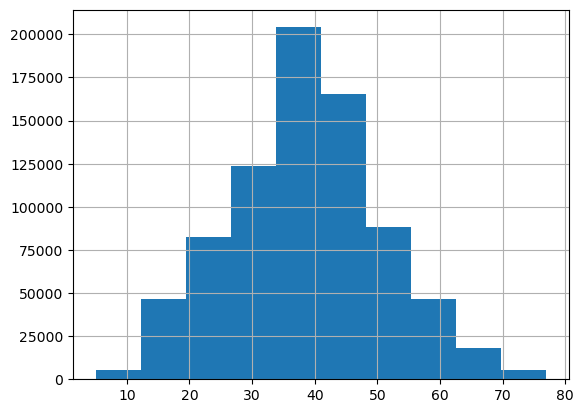

In [59]:
df_merged['age'].hist()

In [60]:
df_merged['age'].describe()

count    786260.000000
mean         38.463391
std          12.171305
min           5.000000
25%          31.000000
50%          38.000000
75%          46.000000
max          77.000000
Name: age, dtype: float64

In [61]:
# Минимальный возраст клиента
df_merged['age'].min()

5

In [62]:
# Образование несовершеннолетних клиентов
df_merged[df_merged['age'] < 18]['education'].value_counts()

education
высшее     26893
среднее     8758
Name: count, dtype: int64

В столбце **'age'** содержатся данные о клиентах от 5 до 18 лет, которые имеют среднее и высшее образование. При этом доля высшего образования среди юных клиентов значительно выше, в то время как по общему датасету доля среднего образования превышает высшее.

In [63]:
# Образование по всему датасету
df_merged['education'].value_counts()

education
среднее    629076
высшее     157184
Name: count, dtype: int64

Распределение на гистограмме похоже на нормальное, а выявить аномалии стандартными методами затруднительно. На диаграмме "ящик с усами" часть значений выходят за границы нормальных значений. Но на этой диаграмме возраст от 10 лет уже считается нормальным для клиента, хотя по логике здравого смысла это не так, поскольку 10-летние клиенты не могут покупать вещи для взрослых и не могут иметь даже среднего образования.

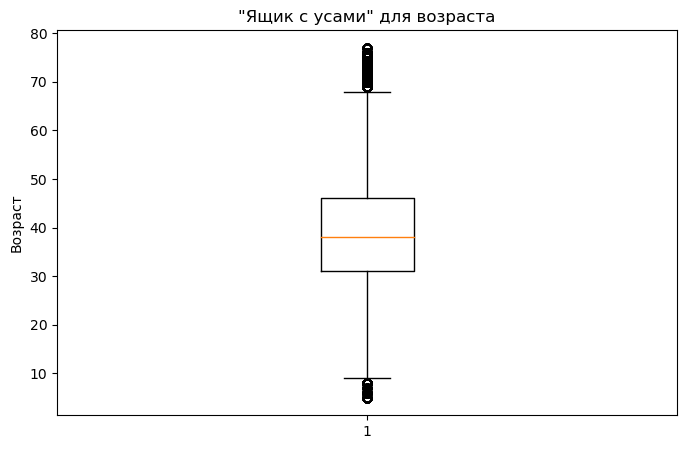

In [64]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_merged.age)
plt.ylabel('Возраст')
plt.title('"Ящик с усами" для возраста');

 средний возраст высшего образования 25.0 лет


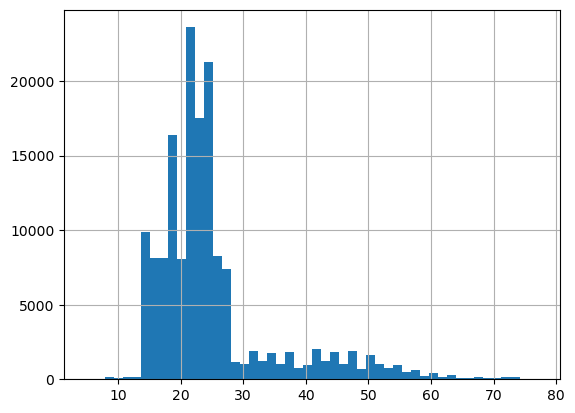

In [65]:
age_high = df_merged[df_merged['education'] == 'высшее']['age']
age_high.hist(bins=50)
age_high_mean = round(age_high.mean(), 0)
print(f' средний возраст высшего образования {age_high_mean} лет')

 средний возраст среднего образования 42.0 лет


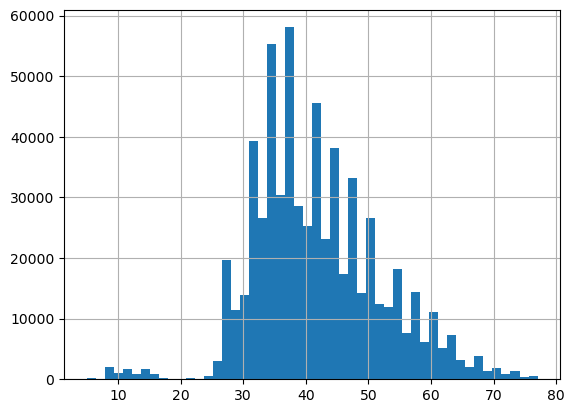

In [66]:
age_middle = df_merged[df_merged['education'] == 'среднее']['age']
age_middle.hist(bins=50)
age_middle_mean = round(age_middle.mean(), 0)
print(f' средний возраст среднего образования {age_middle_mean} лет')

**Выводы по колонке 'age':**  
1) Будем считать, что возраст клиента до 18 лет, указан ошибочно. При этом будем считать, что образование указано верно.    
2) Исправим возраст до 18 лет с высшим образованием на 25 - средний возраст высшего образования.    
3) Исправим возраст до 18 лет со средним образованием на 42 - средний возраст среднего образования.  

In [67]:
df_merged.loc[(df_merged['age'] < 18) & (df_merged['education'] == 'высшее'), 'age'] = 25
df_merged.loc[(df_merged['age'] < 18) & (df_merged['education'] == 'среднее'), 'age'] = 42

In [68]:
df_merged['age'].describe()

count    786260.000000
mean         39.117521
std          11.325945
min          18.000000
25%          31.000000
50%          38.000000
75%          46.000000
max          77.000000
Name: age, dtype: float64

#### Колонка **cost**

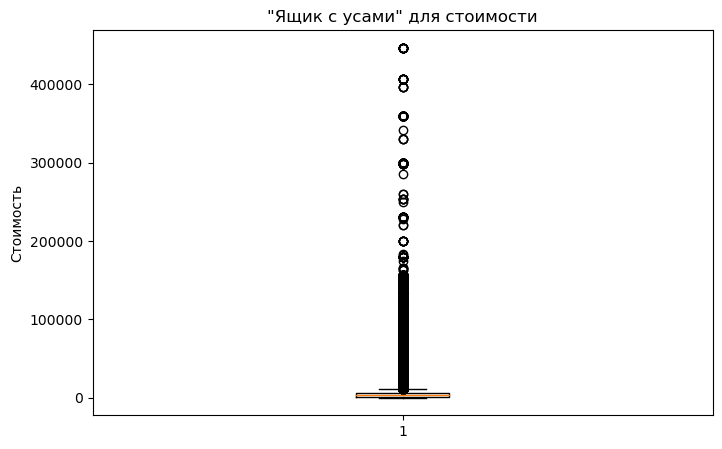

In [69]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_merged.cost)
plt.ylabel('Стоимость')
plt.title('"Ящик с усами" для стоимости');

In [70]:
df_merged[df_merged['cost'] > 200000]['product'].unique()

array(['велосипед горный merida one sixty 400 27.5"',
       'наклонная беговая дорожка nordictrack commercial x22i',
       'велосипед горный merida one forty 700 27.5"',
       'эхолот lowrance hds-12 live с датчиком active imaging 3-в-1',
       'велосипед горный merida one forty 400 29"',
       'эхолот lowrance hds-9 live с датчиком active imaging 3-в-1',
       'беговая дорожка электрическая nordictrack commercial 2450',
       'велосипед шоссейный trek emonda sl 6 disc 700c',
       'беговая дорожка электрическая nordictrack commercial 2950'],
      dtype=object)

In [71]:
df_merged['cost'].describe()

count    786260.000000
mean       5406.566271
std       10394.947580
min         -30.000000
25%        1499.000000
50%        2999.000000
75%        5599.000000
max      446420.000000
Name: cost, dtype: float64

In [72]:
df_merged[df_merged['cost'] < 0]

,id,product,colour,cost,product_sex,base_sale,dt,gender_age_category,product_category,main_colour,gender,age,education,city,country,personal_coef
127712,28660,мазь скольжения toko express rub-on 40 г 0 °c,неопределенный,-30,0.0,0,2,unknown,others,неопределенный,0.0,22,высшее,1182,32,0.5584
127720,28660,мазь скольжения toko express rub-on 40 г 0 °c,неопределенный,-30,0.0,0,3,unknown,others,неопределенный,0.0,22,высшее,1182,32,0.5584
691017,156357,мазь скольжения toko express pocket 100 мл 0 °c,неопределенный,-30,0.0,0,37,unknown,others,неопределенный,1.0,43,среднее,1188,32,0.4304
699127,158185,мазь скольжения toko express mini 75 мл 0 °c,неопределенный,-30,0.0,0,23,unknown,others,неопределенный,NaN,36,среднее,1134,32,0.5072


Выводы по колонке **cost:**  
1) Аномально высокие цены в основном на горные велосипеды и эхолоты. В первом случае товар предназначен для экстремальных видов спорта. Во втором случае речь идет о сложном элетронном оборудовании. Будем считать, что ошибки в ценах здесь нет и менять ничего не будем.  
2) Минимальное значение цены -30 по всей видимости указано ошибочно. Реальное значение цены укажем без минуса, равным 30.

In [73]:
df_merged.loc[df_merged['cost'] < 0, 'cost'] = 30

In [74]:
df_merged['cost'].describe()

count    786260.000000
mean       5406.566576
std       10394.947421
min          12.000000
25%        1499.000000
50%        2999.000000
75%        5599.000000
max      446420.000000
Name: cost, dtype: float64

## Бинарная классификация

### Восстановление утерянных данных по таблице personal data в единой витрине данных

Теперь восстановим недостающие значения **gender** с помощью модели машинного обучения.

In [75]:
# Делим датасет на обучающую и предиктовую выборки
df_merged_train = df_merged[df_merged['gender'].notna()].drop(columns=['product', 'colour', 'id'], axis=1)
df_merged_predict = df_merged[df_merged['gender'].isna()].drop(columns=['product', 'colour', 'id', 'gender'], axis=1)

In [76]:
cat_col = ['gender_age_category', 'product_category', 'main_colour', 'education']
num_col = ['cost', 'product_sex', 'base_sale', 'dt', 'age', 'city', 'country', 'personal_coef']

In [77]:
df_merged_train = normal_encoding(df_merged_train, cat_col, num_col)
df_merged_predict = normal_encoding(df_merged_predict, cat_col, num_col)

In [78]:
# Разделение выборки на обучающий и тестовый наборы
X = df_merged_train.drop(columns=['gender'], axis=1)
y = df_merged_train['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Выбираем модели машинного обучения
models = []
models.append(('dec_tree', DecisionTreeClassifier()))
models.append(('dec_tree-1', DecisionTreeClassifier(max_depth=5, min_samples_split=5)))
models.append(('rf', RandomForestClassifier()))
models.append(('rf-1', RandomForestClassifier(max_depth=5, min_samples_split=5)))

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append((name, cv_results))
    mean_f1 = cv_results.mean()
    print(f'{name}, средняя F-мера: {mean_f1:.4f}')

dec_tree, средняя F-мера: 1.0000
dec_tree-1, средняя F-мера: 1.0000
rf, средняя F-мера: 0.9999
rf-1, средняя F-мера: 0.9861


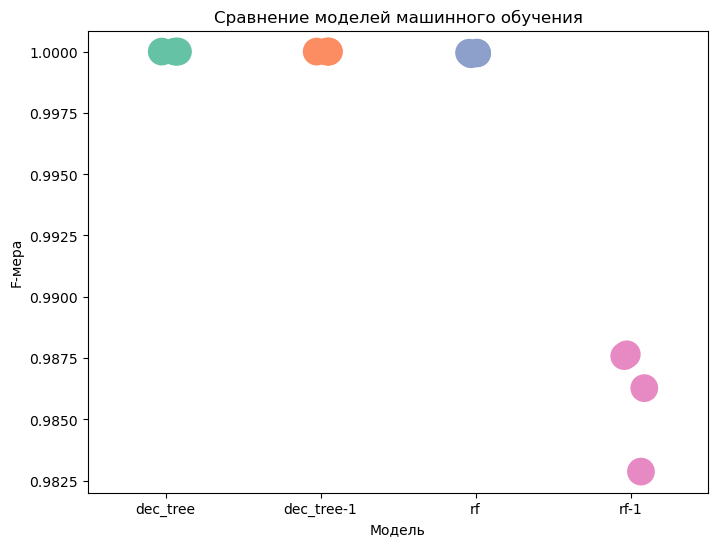

In [80]:
# Визуализация результатов работы модели
plt.figure(figsize=(8, 6))

# Извлечение имен моделей и результатов для построения точечного графика
model_names, model_results = zip(*results)

# Распаковываем результаты для каждой модели
flat_results = [item for sublist in model_results for item in sublist]

# Создаем массив с повторенными именами моделей
model_names_replicated = [name for name, results in zip(model_names, model_results) for _ in results]

sns.stripplot(x=model_names_replicated, y=flat_results, jitter=True, palette="Set2", size=20)
plt.title('Сравнение моделей машинного обучения')
plt.xlabel('Модель')
plt.ylabel('F-мера')
plt.show()

In [81]:
cross_tab = pd.crosstab(df_merged['gender'], df_merged['product_sex'])

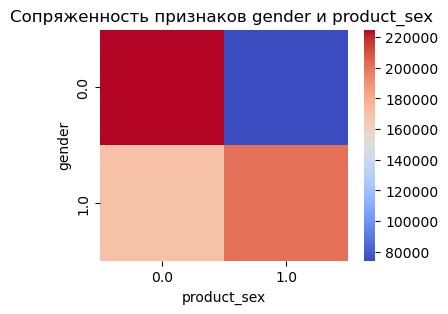

In [82]:
# Визуализация тепловой картой через seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cross_tab, annot=False, cmap='coolwarm', fmt='d')
plt.title('Сопряженность признаков gender и product_sex ')
plt.xlabel('product_sex')
plt.ylabel('gender')
plt.show()

In [83]:
cross_tab_cat = pd.crosstab(df_merged['gender'], df_merged['gender_age_category'])

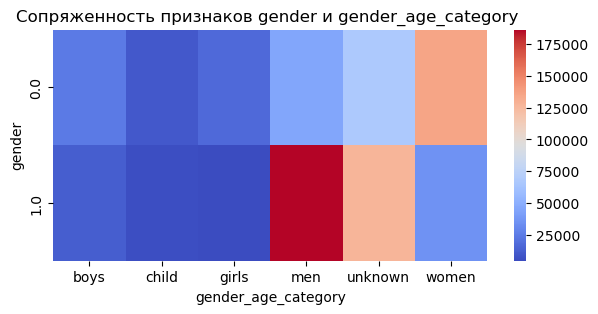

In [84]:
# Визуализация тепловой картой через seaborn
plt.figure(figsize=(7, 3))
sns.heatmap(cross_tab_cat, annot=False, cmap='coolwarm', fmt='d')
plt.title('Сопряженность признаков gender и gender_age_category ')
plt.xlabel('gender_age_category')
plt.ylabel('gender')
plt.show()

Переобучение моделей возникло из-за корреляции признака **gender** от признаков **gender_age_category**. Такая ситуация вполне нормальная, поэтому выбираем любую из моделей для заполнения отсутствующих данных.

In [85]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted_values = model.predict(df_merged_predict)

In [86]:
predicted_values

array([1., 1., 1., ..., 1., 1., 1.])

Заполняем недостающие данные:

In [87]:
df_merged.loc[df_merged['gender'].isnull(), 'gender'] = predicted_values

## Анализ итогов АБ-теста

### Фильтруем данные по стране.  
По техзаданию нам нужна выборка, код страны которой равен 32. Производим фильтрацию:

In [88]:
df_merged_filtered = df_merged[df_merged['country'] == 32]

### Извлечение результатов тестирования.

In [89]:
# Открываем файлы и извлекаем идентификаторы, которые разделены друг с другом пробелами, либо запятой, либо точкой с запятой.
with open ('ids_first_company_positive.txt', 'r') as file:
    test_positive_ids = re.split('[\s;,]+', file.read().strip())
    
with open ('ids_first_company_negative.txt', 'r') as file:
    test_negative_ids = re.split('[\s;,]+', file.read().strip())

In [90]:
# Убираем значения идентификаторов, куда входят буквы. Оставляем только числовые значения.
test_positive_ids = [int(id) for id in test_positive_ids if id.isdigit()]
test_negative_ids = [int(id) for id in test_negative_ids if id.isdigit()]

Добавляем информацию по тестированию в витрину данных.

In [91]:
df_merged_filtered['test_positive'] = 0
df_merged_filtered['test_negative'] = 0

In [92]:
df_merged_filtered.loc[:, 'test_positive'] = df_merged_filtered['id'].apply(lambda x: 1 if x in test_positive_ids else 0)

In [93]:
df_merged_filtered.loc[:, 'test_negative'] = df_merged_filtered['id'].apply(lambda x: 1 if x in test_negative_ids else 0)

### Фильтрация данных по интервалу дат

Рекламная кампания проводилась с 5 по 16 день. Извлекаем данные за временной промежуток с 5 по 16 день включительно:

In [94]:
df_abtest = df_merged_filtered[(df_merged_filtered['dt'] > 4) & (df_merged_filtered['dt'] < 16)]
df_abtest.shape

(208952, 18)

В этих данных есть несколько id, которые содержат единицы в колонке 'test_positive' и 'test_negative' одновременно. Это ошибка, поскольку нельзя предложить скидку и не предложить скидку одновременно. Эти данные следует исключить из теста. К счастью их совсем немного - всего 9 строк, или иначе  - 0,02% от всех данных:

In [95]:
df_abtest[(df_abtest['test_positive']==1)&(df_abtest['test_negative']==1)].shape

(9, 18)

### Выбор метрик и проверка гипотез

Необходимо сформулировать и проверить несколько гипотез, а для этого нужно выбрать несколько метрик. У нас есть исходная метрика - признак cost. Плюс дополнительно создано еще несколько фичей. Попробуем выявить зависимости.

In [96]:
df_abtest

,id,product,colour,cost,product_sex,base_sale,dt,gender_age_category,product_category,main_colour,gender,age,education,city,country,personal_coef,test_positive,test_negative
0,0,"велосипед горный женский stern mira 2.0 26""",белый/синий,13599,0.0,1,7,women,leisure,белый,0.0,36,среднее,1201,32,0.5072,1,0
3,3,бутсы мужские gsd astro,белый,1599,1.0,0,13,men,shoes,белый,1.0,31,среднее,1134,32,0.4304,0,1
16,6,футболка мужская kappa authentic core,темно-синий,999,1.0,0,8,men,sport_closes,синий,1.0,52,среднее,1188,32,0.4304,1,0
17,6,бейсболка детская nike futura mash up,синий,1119,1.0,1,11,child,sport_closes,синий,1.0,52,среднее,1188,32,0.4304,1,0
18,6,"носки детские demix, 2 пары",синий/серый,299,1.0,0,11,child,sport_closes,синий,1.0,52,среднее,1188,32,0.4304,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786252,178004,кроссовки мужские nike air max sc,серый/белый/черный,13999,1.0,0,6,men,shoes,серый,1.0,52,высшее,1188,32,0.4688,0,0
786253,178004,кроссовки мужские fila regen,неопределенный,5999,1.0,0,9,men,shoes,неопределенный,1.0,52,высшее,1188,32,0.4688,0,0
786254,178004,жилет мужской icepeak manheim,неопределенный,8699,1.0,0,9,men,sport_closes,неопределенный,1.0,52,высшее,1188,32,0.4688,0,0
786255,178004,полуботинки мужские ascot vortex,хаки/черный,7999,1.0,0,12,men,shoes,хаки,1.0,52,высшее,1188,32,0.4688,0,0


Создаем "контрольный" и "тестовый" датасеты так, чтобы туда не входили ошибочные строки.

In [97]:
control_df = df_abtest[(df_abtest['test_negative'] == 1) & (df_abtest['test_positive'] == 0)]
test_df = df_abtest[(df_abtest['test_positive'] == 1) & (df_abtest['test_negative'] == 0)]

print(control_df.shape)
print(test_df.shape)

(12155, 18)
(23160, 18)


#### Средняя выручка с клиента

Один покупатель мог купить несколько раз, поэтому группируем данные по id, а значение cost при этом суммируем. Так мы получим стоимость покупок на каждого покупателя в тесте. 

Показатель **cost** в данном случае будет основной и единственной метрикой при тестировании.  При тестировании мы будем сравнивать среднее значение cost тестовой группы и среднее значение cost контрольной группы. Иными словами, мы будем сравнивать среднюю выручку с клиента.   

**Нулевая гипотеза**: Средняя выручка в контрольной и тестовой группе не отличается.

In [98]:
# Датасет контрольной группы
pivot_control_df = pd.pivot_table(control_df, index='id', values = 'cost', aggfunc='sum')
pivot_control_df

,cost
id,
3,1599
70,3999
75,4499
87,10997
126,35544
...,...
177561,86687
177578,14279
177711,909


In [99]:
# Датасет тестовой группы
pivot_test_df = pd.pivot_table(test_df, index='id', values='cost', aggfunc='sum')
pivot_test_df

,cost
id,
0,13599
6,17215
18,27535
58,3708
67,9766
...,...
177918,7346
177924,8996
177946,36606


Рассчитываем среднюю выручку для каждой группы

In [100]:
# Среднее значение выручки в контрольной группе
mean_control = pivot_control_df['cost'].mean()

In [101]:
# Среднее значение выручки в тестовой группе
mean_test = pivot_test_df['cost'].mean()

In [102]:
# Проведение t-теста для определения статистической значимости
t_stat, p_value = stats.ttest_ind(pivot_control_df, pivot_test_df)

In [103]:
# Вывод результатов
print(f'Средняя выручка в контрольной группе: {mean_control}')
print(f'Средняя выручка в тестовой группе: {mean_test}')
print(f'p-значение: {p_value}')

# Проверка статистической значимости изменения средней выручки
if p_value < 0.05:
    print('Различие в средней выручке статистически значимо.')
else:
    print('Различие в средней выручке не является статистически значимым.')

Средняя выручка в контрольной группе: 22449.227835396454
Средняя выручка в тестовой группе: 26453.439862542957
p-значение: [2.16581815e-05]
Различие в средней выручке статистически значимо.


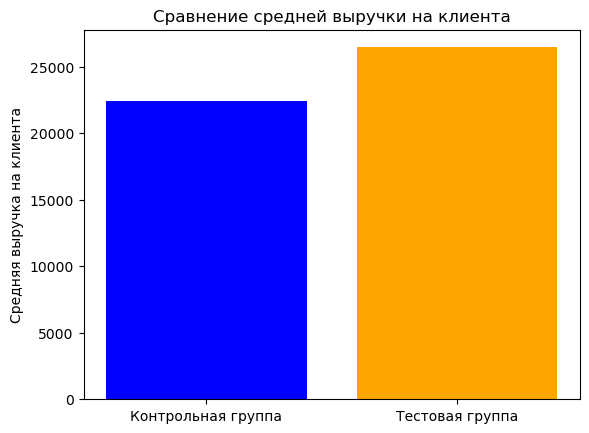

In [104]:
# Построение столбчатой диаграммы
fig, ax = plt.subplots()
ax.bar(['Контрольная группа', 'Тестовая группа'], [mean_control, mean_test], color=['blue', 'orange'])
ax.set_ylabel('Средняя выручка на клиента')
ax.set_title('Сравнение средней выручки на клиента')

# Отображение графика
plt.show()

Для уровня значимости 0,05 значение средней выручки тестовой группы больше значения средней выручки в контрольной группе.  
Нулевая гипотеза о равенстве значений средних выручек отвергается.

Средняя выручка по тестовой аудитории значимо выше.  
Первая маркетинговая кампания была эффективна. Рекомендуется использовать данный инструмент для увеличения прибыли компании.

#### Средний чек

Чеком будем считать выручку на одного клиента за 1 день.  
Построим контрольный и тестовый датасеты, в столбце cost агрегируем сумму покупки одним клиентом в один день - то есть чек.

In [105]:
mean_check_control = control_df.groupby(['dt', 'id']).agg({'cost': 'sum'})
mean_check_test = test_df.groupby(['dt', 'id']).agg({'cost': 'sum'})
print(mean_check_control.shape)
print(mean_check_test.shape)

(6100, 1)
(11568, 1)


In [106]:
mean_check_control

cost
dt id           
5  70       3999
   476       699
   911     94999
   1110      749
   1139     2448
...          ...
15 177118  11797
   177175    599
   177211  10598
   177561  14298
   177578   9998

[6100 rows x 1 columns]

**Нулевая гипотеза: средний чек контрольной и тестовой выборки не отличаются**

In [107]:
# df_group1 и df_group2 - это ваши две группы для сравнения
t_stat, p_value = ttest_ind(mean_check_control['cost'], mean_check_test['cost'], equal_var=False)

print("t-статистика:", t_stat)
print("p-значение:", p_value)

t-статистика: 1.4196893005336744
p-значение: 0.15572437354625032


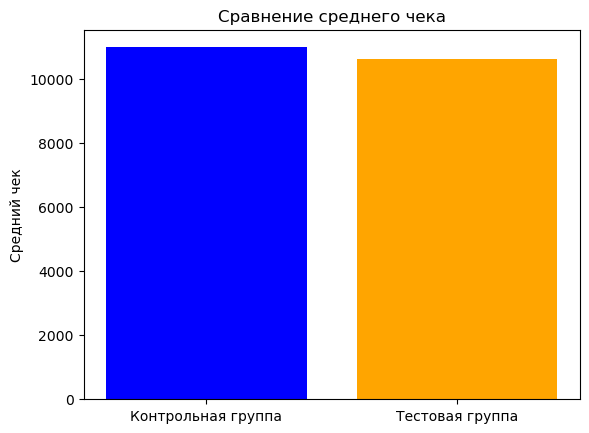

In [108]:
# Построение столбчатой диаграммы
meanCheck_control_cost = mean_check_control['cost'].mean()
meanCheck_test_cost = mean_check_test['cost'].mean()
fig, ax = plt.subplots()
ax.bar(['Контрольная группа', 'Тестовая группа'], [meanCheck_control_cost, meanCheck_test_cost], color=['blue', 'orange'])
ax.set_ylabel('Средний чек')
ax.set_title('Сравнение среднего чека')

# Отображение графика
plt.show()

**Вывод:**  
Разница в средней выручки в контрольной и тестовой группах статистически не значима.

#### Количество проданных товаров

In [109]:
control_product_count = control_df['product'].count()

In [110]:
test_product_count = test_df['product'].count()

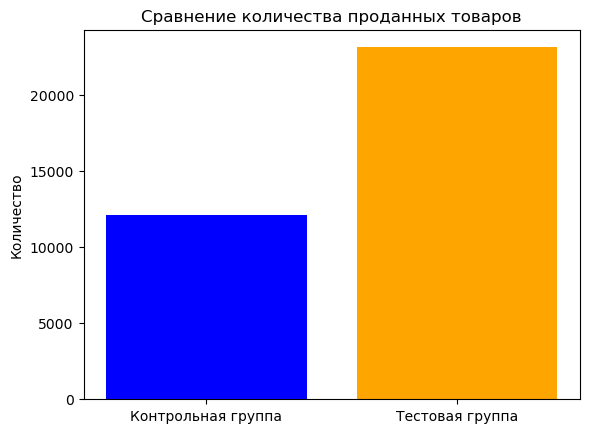

In [111]:
fig, ax = plt.subplots()
ax.bar(['Контрольная группа', 'Тестовая группа'], [control_product_count, test_product_count], color=['blue', 'orange'])
ax.set_ylabel('Количество')
ax.set_title('Сравнение количества проданных товаров')

# Отображение графика
plt.show()

**Вывод:**  
Товаров в тестовой группе продано в два раза больше.

#### Объем продаж

В исходных данных каждая строка - это факт покупки одного товара. При проведении рекламной кампании количество строк покупок в тестовой группе значительно превышает количество строк покупок контрольной группы. Это объективно говорит о том, что товаров было куплено больше именно при проведении маркетинговой кампании, то есть когда клиентам предлагалась скидка.  
Чтобы определить объем продаж в контрольной и тестовой группе нужно посчитать сумму стоимости всех проданных товаров и там и там. При значительной разнице в стоимости, нам не потребуется сравнивать ее с помощью статистического критерия, потому что разница и так будет объективной.

In [112]:
control_cost = control_df['cost'].sum()
control_cost

67100742

In [113]:
test_cost = test_df['cost'].sum()
test_cost

123167216

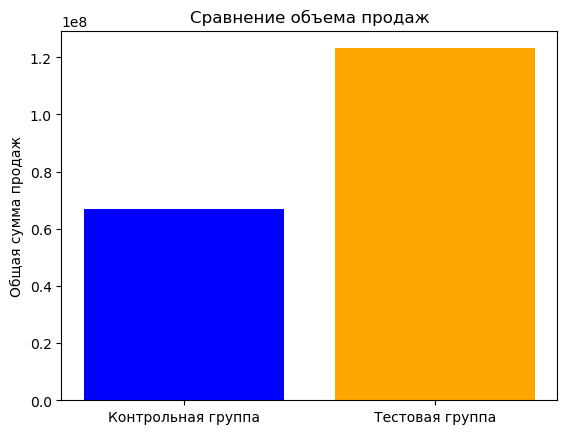

In [114]:
fig, ax = plt.subplots()
ax.bar(['Контрольная группа', 'Тестовая группа'], [control_cost, test_cost], color=['blue', 'orange'])
ax.set_ylabel('Общая сумма продаж')
ax.set_title('Сравнение объема продаж')

# Отображение графика
plt.show()

**Вывод**  
Объем продаж в тестовой группе почти в два раза превышает объем продаж в контрольной группе

### Общий вывод по АБ-тесту

1) Средняя выручка с клиента в тестовой группе значимо больше, чем в контрольной;  
2) Объем продаж в тестовой группе примерно в два раза выше, чем в контрольной;  
3) Различие в среднем чеке в тестовой и контрольной группах статистически не значимо;  
4) Товаров в тестовой группе продано в два раза больше.

**Бизнес рекомендация:**  
Рекламная кампания была эффективной. Рекомендуется использовать данный инструмент для увеличения прибыли.

## Кластеризация

### Feature Engineering

#### age_category

In [115]:
df_merged_filtered['age_category'] = 'unknown'
df_merged_filtered['age_category'] = df_merged_filtered['age'].apply(lambda x: 'young' if x < 30 else('middle' if x < 50 else 'old'))

In [116]:
df_merged_filtered['age_category'].value_counts()

age_category
middle    473347
young     164246
old       142524
Name: count, dtype: int64

Среди покупателей есть более лояльные и менее лояльные. Так например, есть покупатели, которые совершили только покупку одного товара. А есть те, которые купили больше одного товара.  

Также есть такие покупатели, которые сделали свои покупки за 1 день, а есть такие, которые вернулись в другие дни и совершили повторную покупку.  

Создадим два дополнительных признака по этим описаниям. В первом признаке целесообразно поделить аудиторию на две группы: кто купил всего 1 товар и кто купил более одного товара. Назовем признак 'more_one_item' со значениями 0, если количество купленных товаров = 1, и со значением 1, если купленных товаров больше одного.  

Второй дополнительный признак тоже пусть будет бинарным. Признак 'return_client' будет равняться 0, если покупки были в один день, и 1, если покупки совершались в несколько дней.

#### more_one_item

In [117]:
# Создаем датафрейм с признаком more_one_item - купил больше одного товара.
value_counts_id = df_merged_filtered['id'].value_counts()
df_counts_id = pd.DataFrame({'id': value_counts_id.index, 'count': value_counts_id.values})
df_counts_id['more_one_item'] = 0
df_counts_id['more_one_item'] = df_counts_id['count'].apply(lambda x: 1 if x > 1 else 0)
df_counts_id.drop(columns=['count'], axis=1, inplace=True)

In [118]:
# Добавляем признак more_one_item в общую таблицу
df_merged_filtered = pd.merge(df_merged_filtered, df_counts_id, how='left', on='id')
df_merged_filtered.head()

,id,product,colour,cost,product_sex,base_sale,dt,gender_age_category,product_category,main_colour,gender,age,education,city,country,personal_coef,test_positive,test_negative,age_category,more_one_item
0,0,"велосипед горный женский stern mira 2.0 26""",белый/синий,13599,0.0,1,7,women,leisure,белый,0.0,36,среднее,1201,32,0.5072,1,0,middle,1
1,0,стол outventure,зелёный,1499,0.0,0,37,unknown,others,зеленый,0.0,36,среднее,1201,32,0.5072,1,0,middle,1
2,0,набор outventure: стол + 4 стула,бежевый,4799,0.0,0,37,unknown,sets,бежевый,0.0,36,среднее,1201,32,0.5072,1,0,middle,1
3,3,бутсы мужские gsd astro,белый,1599,1.0,0,13,men,shoes,белый,1.0,31,среднее,1134,32,0.4304,0,1,middle,1
4,3,мяч футбольный puma teamfinal 21.2 fifa qualit...,мультицвет,7199,0.0,0,27,unknown,balls,мультицвет,1.0,31,среднее,1134,32,0.4304,0,1,middle,1


#### return_client

Создаем признак **return_client**, который будет обозначать лояльных клиентов, или другими словами - клиентов, совершивших покупку более одного раза.

In [119]:
def custom_agg(x):
    return x.max() - x.min()

In [120]:
df_return = df_merged_filtered.pivot_table(index='id', values = 'dt', aggfunc=custom_agg)
df_return.head()

,dt
id,
0,30
3,21
4,32
6,29
7,43


In [121]:
df_return['return_client'] = 0
df_return['return_client'] = df_return['dt'].apply(lambda x: 1 if x > 0 else 0 )

In [122]:
df_return.drop(columns=['dt'], axis=1, inplace=True)

In [123]:
df_return

,return_client
id,
0,1
3,1
4,1
6,1
7,1
...,...
177998,1
177999,1
178001,1


In [124]:
# Добавляем новый признак в общую витрину данных
df_merged_filtered = pd.merge(df_merged_filtered, df_return, how='left', on= 'id')

In [125]:
df_merged_filtered.head()

,id,product,colour,cost,product_sex,base_sale,dt,gender_age_category,product_category,main_colour,...,age,education,city,country,personal_coef,test_positive,test_negative,age_category,more_one_item,return_client
0,0,"велосипед горный женский stern mira 2.0 26""",белый/синий,13599,0.0,1,7,women,leisure,белый,...,36,среднее,1201,32,0.5072,1,0,middle,1,1
1,0,стол outventure,зелёный,1499,0.0,0,37,unknown,others,зеленый,...,36,среднее,1201,32,0.5072,1,0,middle,1,1
2,0,набор outventure: стол + 4 стула,бежевый,4799,0.0,0,37,unknown,sets,бежевый,...,36,среднее,1201,32,0.5072,1,0,middle,1,1
3,3,бутсы мужские gsd astro,белый,1599,1.0,0,13,men,shoes,белый,...,31,среднее,1134,32,0.4304,0,1,middle,1,1
4,3,мяч футбольный puma teamfinal 21.2 fifa qualit...,мультицвет,7199,0.0,0,27,unknown,balls,мультицвет,...,31,среднее,1134,32,0.4304,0,1,middle,1,1


#### count_item

In [126]:
# Создание признака количества купленных товаров
count_item = df_merged_filtered.pivot_table(index='id', values = 'product', aggfunc='count')
count_item['count_item'] = count_item['product']
count_item.drop(columns=['product'], axis=1, inplace=True)
df_merged_filtered = pd.merge(df_merged_filtered, count_item, how='left', on='id')

#### many_items

Количество купленных товаров на одного клиента тоже имеет много уникальных значений

In [127]:
len(df_merged_filtered['count_item'].unique())

173

<Axes: >

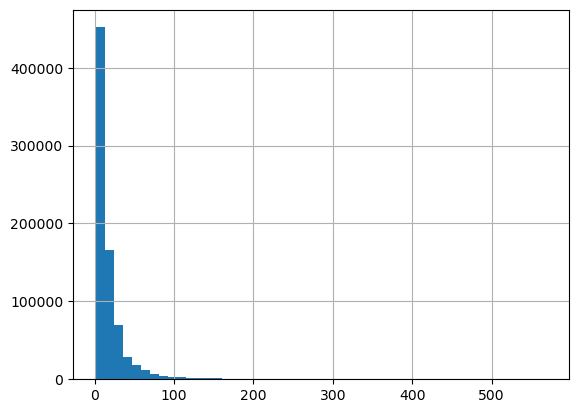

In [128]:
# Распределение числа купленных товаров среди клиентов
df_merged_filtered['count_item'].hist(bins=50)

In [129]:
df_merged_filtered['count_item'].describe()

count    780117.000000
mean         19.859584
std          36.249000
min           1.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         569.000000
Name: count_item, dtype: float64

Создадим признак **'many items'** принимающий значение 1, если число купленных товаров клиентом больше 10, и 0 - если 10 или меньше.

In [130]:
df_merged_filtered['many_items'] = 0
df_merged_filtered['many_items'] = df_merged_filtered['count_item'].apply(lambda x: 1 if x > 10 else 0)

#### count_days

In [131]:
def count_days(x):
    return len(x.value_counts())

In [132]:
# Создание признака, обозначающего количество покупок, считая: один день - одна покупка
count_days = df_merged_filtered.pivot_table(index='id', values = 'dt', aggfunc=count_days)
count_days['count_days'] = count_days['dt']
count_days.drop(columns=['dt'], axis=1, inplace=True)
df_merged_filtered = pd.merge(df_merged_filtered, count_days, how='left', on='id')

In [133]:
df_merged_filtered['count_days'].nunique()

56

#### ltv

In [134]:
def ltv(x):
    return x.max() - x.min()

In [135]:
# Создание признака "life time value", обозначающего разницу между первым посещением клиента и крайним.
ltv_days = df_merged_filtered.pivot_table(index='id', values = 'dt', aggfunc=ltv)
ltv_days['ltv'] = ltv_days['dt']
ltv_days.drop(columns=['dt'], axis=1, inplace=True)
df_merged_filtered = pd.merge(df_merged_filtered, ltv_days, how='left', on='id')

In [136]:
df_merged_filtered['ltv'].nunique()

59

#### long_ltv

В признаке ltv много уникальных значений, что может повлиять на качество модели

In [137]:
len(df_merged_filtered['ltv'].unique())

59

In [138]:
df_merged_filtered['ltv'].describe()

count    780117.000000
mean         39.106308
std          14.719712
min           0.000000
25%          30.000000
50%          43.000000
75%          51.000000
max          58.000000
Name: ltv, dtype: float64

<Axes: >

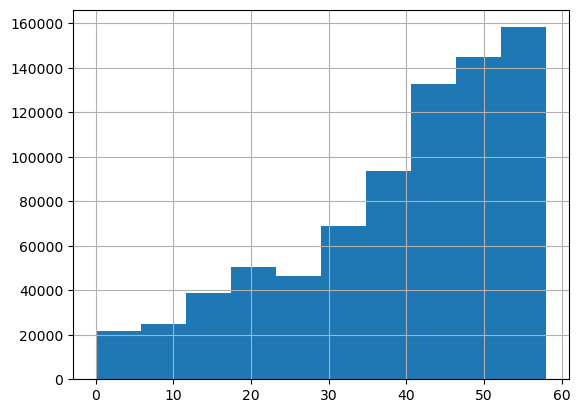

In [139]:
df_merged_filtered['ltv'].hist()

"Life time value" имеет 59 уникальных значений. Снижаем это число до 2-х, создав признак со значениями "длинный период", и "короткий период", взяв за "длинный период" значение превышающее 29. Значение 29 выбираем поскольку на 30 гистограмма резко совершает скачок. Также 30 является медианным значением

In [140]:
df_merged_filtered['long_ltv'] = 0
df_merged_filtered['long_ltv'] = df_merged_filtered['ltv'].apply(lambda x: 1 if x > 29 else 0)

#### expensive_item

<Axes: >

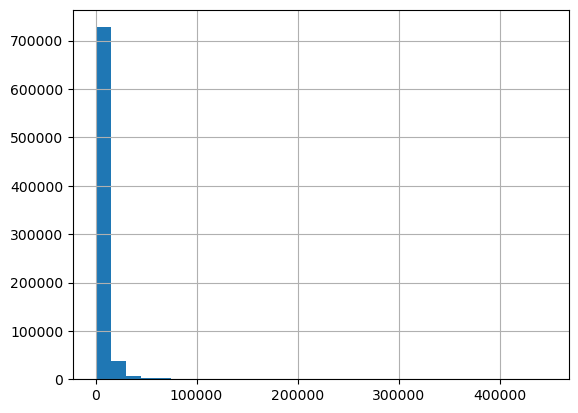

In [141]:
# Распределение стоимости товара
df_merged_filtered['cost'].hist(bins=30)

In [142]:
df_merged_filtered['cost'].describe()

count    780117.000000
mean       5412.478513
std       10399.469444
min          12.000000
25%        1499.000000
50%        2999.000000
75%        5599.000000
max      446420.000000
Name: cost, dtype: float64

Создадим столбец **'expensive_item'** со значением 1, если товар дороже 2999, и 0, если нет.

In [143]:
df_merged_filtered['expensive_item'] = 0
df_merged_filtered['expensive_item'] = df_merged_filtered['cost'].apply(lambda x: 1 if x > 2999 else 0)

#### define_colour

In [144]:
df_merged_filtered['define_colour'] = df_merged_filtered['main_colour'].apply(lambda x: 0 if x == 'неопределенный' else 1)

In [145]:
df_merged_filtered['define_colour'].value_counts()

define_colour
1    660562
0    119555
Name: count, dtype: int64

#### id_profit

In [146]:
df_id_profit = df_merged_filtered.groupby(['id']).agg({'cost': 'sum'})
df_id_profit['id_profit'] = df_id_profit['cost']
df_id_profit.drop(columns=['cost'], axis=1, inplace=True)
df_merged_filtered = pd.merge(df_merged_filtered, df_id_profit, how='left', on='id')

#### id_mid_check

In [147]:
df_sum_dt = df_merged_filtered.groupby(['id', 'dt']).agg({'cost': 'sum'})
df_id_mid_check= df_sum_dt.groupby(['id']).agg({'cost': 'mean'})
df_id_mid_check['mid_check'] = df_id_mid_check['cost']
df_id_mid_check.drop(columns=['cost'], axis=1, inplace=True)
df_merged_filtered = pd.merge(df_merged_filtered, df_id_mid_check, how='left', on='id')
df_merged_filtered.head()

,id,product,colour,cost,product_sex,base_sale,dt,gender_age_category,product_category,main_colour,...,return_client,count_item,many_items,count_days,ltv,long_ltv,expensive_item,define_colour,id_profit,mid_check
0,0,"велосипед горный женский stern mira 2.0 26""",белый/синий,13599,0.0,1,7,women,leisure,белый,...,1,3,0,2,30,1,1,1,19897,9948.500000
1,0,стол outventure,зелёный,1499,0.0,0,37,unknown,others,зеленый,...,1,3,0,2,30,1,0,1,19897,9948.500000
2,0,набор outventure: стол + 4 стула,бежевый,4799,0.0,0,37,unknown,sets,бежевый,...,1,3,0,2,30,1,1,1,19897,9948.500000
3,3,бутсы мужские gsd astro,белый,1599,1.0,0,13,men,shoes,белый,...,1,4,0,3,21,0,0,1,14596,4865.333333
4,3,мяч футбольный puma teamfinal 21.2 fifa qualit...,мультицвет,7199,0.0,0,27,unknown,balls,мультицвет,...,1,4,0,3,21,0,1,1,14596,4865.333333


In [148]:
df_merged_filtered['id_profit'].describe().round(2)

count     780117.00
mean      108676.16
std       294075.95
min           50.00
25%        21397.00
50%        44597.00
75%        96791.00
max      5765079.00
Name: id_profit, dtype: float64

#### profit_cat

In [149]:
df_merged_filtered['profit_cat'] = df_merged_filtered['id_profit'].apply(lambda x: 0 if x < 21397 else(1 if x < 96791 \
                                   else 2))

In [150]:
df_merged_filtered['mid_check'].describe().round(2)

count    780117.00
mean      10057.76
std       10827.86
min          50.00
25%        4496.22
50%        7148.67
75%       11647.86
max      359999.00
Name: mid_check, dtype: float64

#### check_cat

In [151]:
df_merged_filtered['check_cat'] = df_merged_filtered['mid_check'].apply(lambda x: 0 if x < 4496 \
                                else(1 if x < 11647 else 2))

In [152]:
df_merged_filtered['profit_cat'].value_counts()

profit_cat
1    390067
2    195049
0    195001
Name: count, dtype: int64

In [153]:
df_merged_filtered['check_cat'].value_counts()

check_cat
1    390022
2    195096
0    194999
Name: count, dtype: int64

#### education_num

In [154]:
df_merged_filtered['education'].value_counts()

education
среднее    623999
высшее     156118
Name: count, dtype: int64

In [155]:
df_merged_filtered['education_num'] = df_merged_filtered['education'].apply(lambda x: 0 if x == 'среднее' else 1)

#### age_cat_num

In [156]:
df_merged_filtered['age_category'].value_counts()

age_category
middle    473347
young     164246
old       142524
Name: count, dtype: int64

In [157]:
df_merged_filtered['age_cat_num'] = df_merged_filtered['age_category'].apply(lambda x: 0 if x == 'young' \
                                    else(1 if x == 'middle' else 2))

#### cost_cat

In [158]:
df_merged_filtered['cost'].describe()

count    780117.000000
mean       5412.478513
std       10399.469444
min          12.000000
25%        1499.000000
50%        2999.000000
75%        5599.000000
max      446420.000000
Name: cost, dtype: float64

In [159]:
df_merged_filtered['cost_cat'] = df_merged_filtered['cost'].apply(lambda x: 0 if x < 1499 else (1 if x < 5599 else 2))

### Определение числа кластеров

Выберем признаки, которые будут участвовать в определении числа кластеров и в первом варианте кластеризации. Столбцы выбираем, исходя из логических соображений.

In [160]:
cluster_columns = ['product_sex',
                   'base_sale',
                   'gender_age_category',
                   'gender',
                   'return_client',
                   'more_one_item',
                   'cost_cat', 
                   'profit_cat',
                   'check_cat',
                   'education_num',
                   'age_cat_num']

In [161]:
drop_columns = ['id', 
                'product', 
                'colour', 
                'cost', 
                'dt', 
                'long_ltv', 
                'main_colour', 
                'age', 
                'education', 
                'city', 
                'country', 
                'personal_coef', 
                'test_positive', 
                'test_negative', 
                'age_category', 
                'count_item', 
                'count_days', 
                'ltv', 
                'id_profit', 
                'expensive_item', 
                'mid_check', 
                'product_category', 
                'define_colour', 
                'many_items']

In [162]:
# Проверяем нет ли повторяющихся значений в списках и все ли столбцы учтены.
repeat_list = []
for column in cluster_columns:
    if column in drop_columns:
        repeat_list.append(column)
if len(repeat_list) > 0:
    print(f'Повторяющиеся колонки: {repeat_list}')
else:
    print('Повторяющихся колонок нет')
if len(cluster_columns) + len(drop_columns) != len(df_merged_filtered.columns):
    print('Число колонок не соответствует!')
else:
    print('Число колонок совпадает')

Повторяющихся колонок нет
Число колонок совпадает


In [163]:
df_clustering = df_merged_filtered[cluster_columns]

In [164]:
df_clustering

,product_sex,base_sale,gender_age_category,gender,return_client,more_one_item,cost_cat,profit_cat,check_cat,education_num,age_cat_num
0,0.0,1,women,0.0,1,1,2,0,1,0,1
1,0.0,0,unknown,0.0,1,1,1,0,1,0,1
2,0.0,0,unknown,0.0,1,1,1,0,1,0,1
3,1.0,0,men,1.0,1,1,1,0,1,0,1
4,0.0,0,unknown,1.0,1,1,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
780112,1.0,0,men,1.0,1,1,2,1,2,1,2
780113,1.0,0,men,1.0,1,1,2,1,2,1,2
780114,1.0,0,men,1.0,1,1,2,1,2,1,2
780115,0.0,0,unknown,1.0,1,1,0,1,2,1,2


Стандартизация и нормализация колонок перед кластеризацией:

In [165]:
# Функции, выделяющие названия категориальных и числовых признаков.

def get_numerical_features(df):
    num_columns = []
    for column in df.columns:
        if (df.dtypes[column] == 'int64') or (df.dtypes[column] == 'int32') or \
        (df.dtypes[column] == 'float64'):
            num_columns.append(column)
    
    return num_columns

def get_categorical_features(df):
    cat_columns = []
    for column in df.columns:
        if df.dtypes[column] == 'object':
            cat_columns.append(column)
    
    return cat_columns           

In [166]:
# Определение категориальных и числовых признаков
categorical_features = get_categorical_features(df_clustering)
numerical_features = get_numerical_features(df_clustering)
print(categorical_features)
print(numerical_features)

['gender_age_category']
['product_sex', 'base_sale', 'gender', 'return_client', 'more_one_item', 'cost_cat', 'profit_cat', 'check_cat', 'education_num', 'age_cat_num']


In [167]:
# Создаем ColumnTransformer для всех признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

X = preprocessor.fit_transform(df_clustering)

In [168]:
# Определение числа кластеров методом локтя. По опыту работы, кластеров не должно быть слишком много, поэтому
# строим график в диапазоне 1-11 

def elbow_method(X):
    
    inertias = []
    possible_num_clusters = range(1, 11)  # Пробуем от 1 до 10 кластеров

    for num_clusters in possible_num_clusters:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Визуализация инерции для разных чисел кластеров

    plt.plot(possible_num_clusters, inertias, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

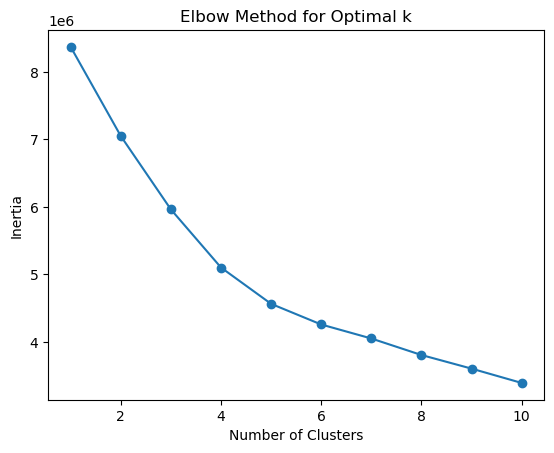

In [169]:
elbow_method(X)

### Разбивка на кластеры

In [170]:
n_clusters = 4

# Проводим кластеризацию методом "К-средних". 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Добавляем колонку 'cluster' в датасеты
df_merged_filtered['cluster'] = kmeans.fit_predict(X)
df_clustering['cluster'] = kmeans.fit_predict(X)

#### Диаграмма рассеяния

In [171]:
def t_sne_visualization(df_clustering, categorical_features, preprocessor):
    
    # Создаем случайную выборку строк из DataFrame
    df_sample = df_clustering.sample(n=50000, random_state=0)

    # Подготовка данных для визуализации
    X_sample = preprocessor.transform(df_sample)  # Используем preprocessor, чтобы преобразовать DataFrame в массив X

    # Визуализация кластеров, используя подобранное число сегментов
    optimal_k = n_clusters 

    categorical_feature_indices = [df_clustering.columns.get_loc(feature) for feature in categorical_features]

    kproto = KPrototypes(n_clusters=optimal_k, init='Huang', n_init=1, random_state=0)
    clusters = kproto.fit_predict(X_sample, categorical=categorical_feature_indices)

    # Уменьшаем размерность с помощью t-SNE
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(X_sample)

    # Добавляем столбцы 'tsne_x' и 'tsne_y' с результатами t-SNE в DataFrame
    df_sample['tsne_x'] = tsne_result[:, 0]
    df_sample['tsne_y'] = tsne_result[:, 1]

    df_sample['cluster_labels'] = clusters

    # Визуализация результатов кластеризации
    plt.figure(figsize=(10, 6))
    for cluster in range(optimal_k):
        cluster_data = df_sample[df_sample['cluster_labels'] == cluster]
        plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'], label=f'Cluster {cluster}')

    plt.title('t-SNE Visualization of Clusters')
    plt.legend()
    plt.show()

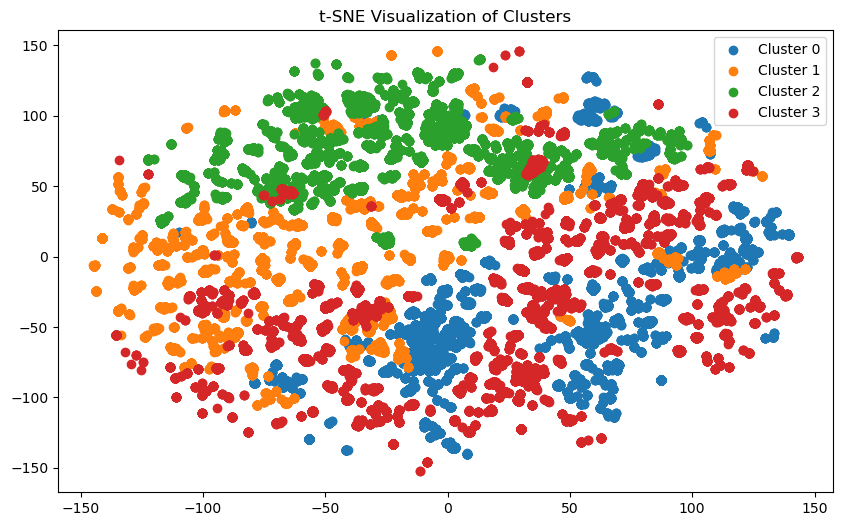

In [172]:
t_sne_visualization(df_clustering, categorical_features, preprocessor)

Данная диаграмма показывает, что первое деление на кластеры оказалось **некачественным**, а именно:  
1. Точки из разных кластеров перемешаны на диаграмме. Практически отсутствуют группировки, за исключением отдельных областей синего и зеленого кластера. Это говорит о схожести в поведении людей разных кластеров.  
2. Расстояние между точками одного кластера и расстояние между точкамии разных кластеров примерно схожее. Это также говорит о похожести поведения людей в разных кластерах.  

#### Важность признаков

Причиной некачественной кластеризации при первой попытке явилось то, что фичи были подобраны "на глазок", руководствуясь обычной логикой. Фактически, некоторые фичи могут наоборот мешать качесвенной кластеризации и создавать "шум". Определим важность фичей внутри каждого из полученных кластеров.

In [173]:
# Список фичей, которые участвовали в первой кластеризации:

importance_columns = ['product_sex', 
                      'base_sale',
                      'gender_age_category',
                      'gender',
                      'return_client',
                      'more_one_item',
                      'cost_cat', 
                      'profit_cat',
                      'check_cat',
                      'education_num',
                      'age_cat_num']

In [174]:
# Функция определения важности признаков в полученных кластерах

def importance_features(df_merged_filtered, importance_columns):
    # Выбираем только колонки с признаками (исключаем колонку 'cluster')
    X = df_merged_filtered[importance_columns]

    # Кодируем категориальные признаки (One-Hot Encoding)
    X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test = train_test_split(X_encoded, test_size=0.2, random_state=42)

    # Создаем модель случайного леса (или любую другую, в зависимости от задачи)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Обучаем модель на обучающих данных
    rf_model.fit(X_train, df_clustering.loc[X_train.index, 'cluster'])

    # Получаем важность признаков
    feature_importance = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)

    # Сортируем признаки по важности в порядке убывания
    feature_importance = feature_importance.sort_values(ascending=False)

    # Выводим оценку важности признаков
    # print(feature_importance)
    
    plt.figure(figsize=(12, 8))
    feature_importance.plot(kind='bar')
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

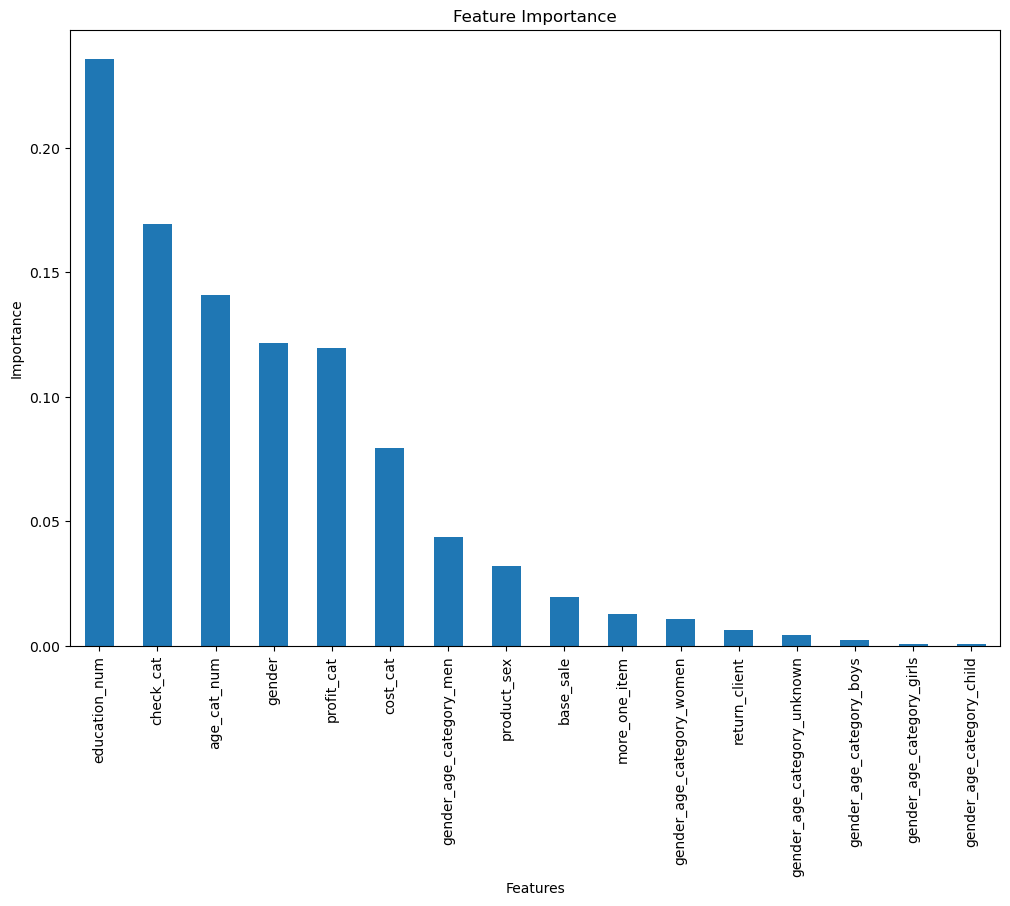

In [175]:
importance_features(df_merged_filtered, importance_columns)

На диаграмме видно, что признаки **gender_age_category** и **return_client** можно убрать из кластеризации. Также необходимо проверить другие признаки, которые в первой кластеризации не участвовали.

#### Подбор признаков на основе важности

In [176]:
importance_columns1 = ['product_sex', 
                      'base_sale',
                      'gender',
                      'cost_cat', 
                      'profit_cat',
                      'check_cat',
                      'education_num',
                      'age_cat_num', 
                      'cost', 
                      'dt', 
                      'long_ltv',
                      'personal_coef', 
                      'count_item', 
                      'count_days', 
                      'ltv',
                      'id_profit', 
                      'mid_check', 
                      'product_category', 
                      'define_colour', 
                      'many_items']

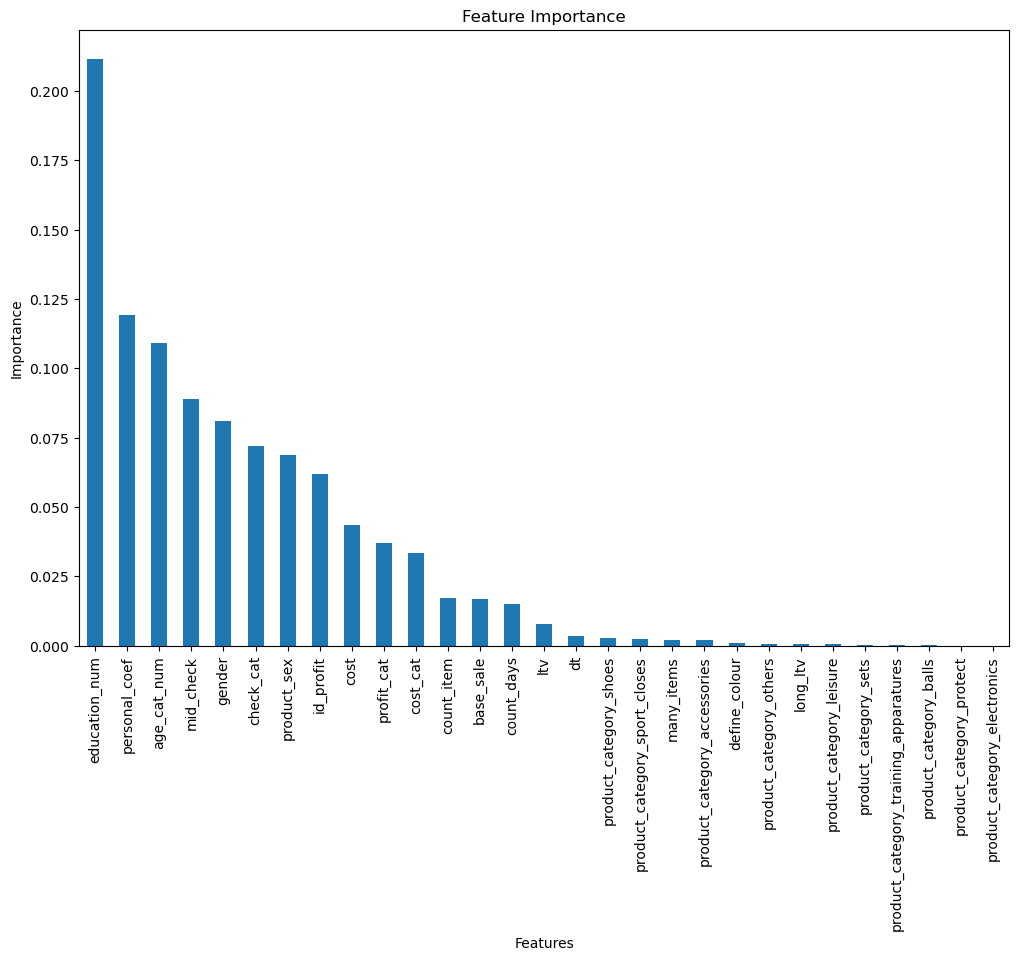

In [177]:
importance_features(df_merged_filtered, importance_columns1)

Составляем новый набор признаков для кластеризации, руководствуясь диаграммой выше. Исключение составляет признак "product_category". Он имеет низкую значимость, но он нам нужен, чтобы определить склонность кластеров к покупке определенных категорий товаров.

In [190]:
cluster_columns1 = ['education_num', 
                   'personal_coef', 
                   'age_cat_num', 
                   'mid_check', 
                   'gender',               
                   'check_cat',
                   'product_sex', 
                   'id_profit', 
                   'cost', 
                   'profit_cat',
                   'cost_cat', 
                   'base_sale', 
                   'product_category']

In [191]:
df_clustering1 = df_merged_filtered[cluster_columns1]

In [192]:
numerical_features1 = get_numerical_features(df_clustering1)

In [193]:
categorical_features1 = get_categorical_features(df_clustering1)

In [194]:
numerical_features1

['education_num',
 'personal_coef',
 'age_cat_num',
 'mid_check',
 'gender',
 'check_cat',
 'product_sex',
 'id_profit',
 'cost',
 'profit_cat',
 'cost_cat',
 'base_sale']

In [195]:
categorical_features1

['product_category']

In [196]:
df_clustering1.columns

Index(['education_num', 'personal_coef', 'age_cat_num', 'mid_check', 'gender',
       'check_cat', 'product_sex', 'id_profit', 'cost', 'profit_cat',
       'cost_cat', 'base_sale', 'product_category'],
      dtype='object')

In [197]:
# Создаем ColumnTransformer для всех признаков
preprocessor1 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features1),
        ('num', StandardScaler(), numerical_features1)
    ]
)

X1 = preprocessor1.fit_transform(df_clustering1)

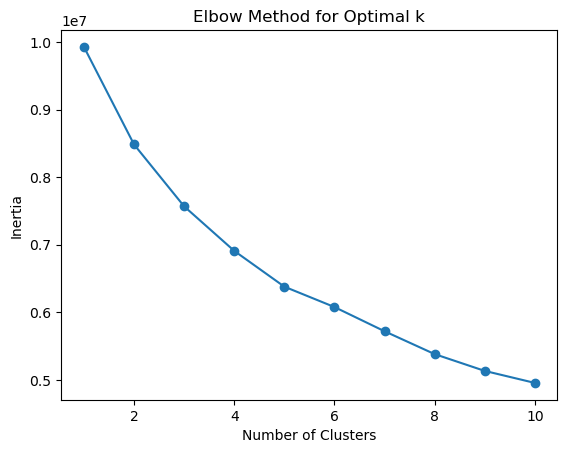

In [198]:
elbow_method(X1)

График метода "локтя" получился на этот раз сглаженным. По нему определить количество кластеров уже затруднительно. Поэтому придерживаемся полученного ранее числа 4.

In [199]:
n_clusters = 4

# Проводим кластеризацию методом "К-средних". 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Добавляем колонку 'cluster' в датасеты
df_merged_filtered['cluster'] = kmeans.fit_predict(X1)
df_clustering1['cluster'] = kmeans.fit_predict(X1)

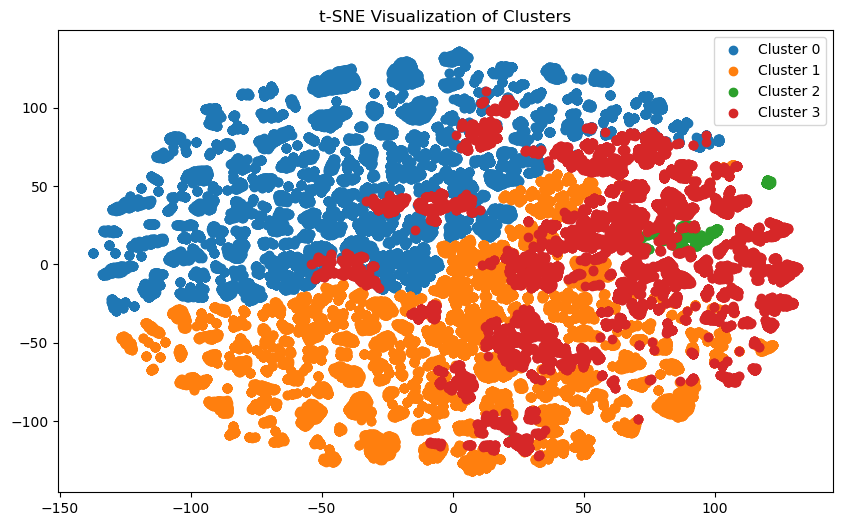

In [200]:
t_sne_visualization(df_clustering1, categorical_features1, preprocessor1)

Повторная кластеризация прошла лучше. Кластеры сгруппированы. Некоторые подгруппы кластеров по своему поведению схожи с другими кластерами, но в целом кластеры различаются и уже не выглядят такими перемешанными.

### Выявление закономерностей в полученных кластерах

#### Группировка средних числовых значений по кластерам

In [201]:
numerical_features1 = get_numerical_features(df_clustering1)

In [202]:
# Выберем только числовые столбцы
df_cluster_num = df_clustering1[numerical_features1]

# Преобразуем в Dask DataFrame
ddf = dd.from_pandas(df_cluster_num, npartitions=20)

# Группировка и вычисление средних значений для числовых столбцов
cluster_means = ddf.groupby('cluster').mean().compute()

In [203]:
cluster_means

,education_num,personal_coef,age_cat_num,mid_check,gender,check_cat,product_sex,id_profit,cost,profit_cat,cost_cat,base_sale
cluster,,,,,,,,,,,,
0,1.000000,0.439210,0.076352,8500.822390,0.706113,0.973952,0.474537,67063.058882,4469.844952,0.913234,1.006887,0.362399
1,0.035236,0.509004,1.187685,6363.876464,0.000000,0.728198,0.248778,50392.181016,3210.561549,0.795651,0.836547,0.426439
2,0.105106,0.448182,1.024638,25740.020503,0.757134,1.977712,0.413822,384306.029055,14146.279992,1.826348,1.474101,0.233647
3,0.011831,0.425989,1.176362,6922.871482,0.986898,0.813850,0.555218,53674.183039,3867.747948,0.848320,0.951003,0.337915


**Кластер 0**  
Молодые мужчины с высшим образованием. Показатели по прибыльности и среднему чеку - средние.

**Кластер 1**  
Женщины среднего образования со средними показателями прибыльности и среднего чека.

**Кластер 2**  
Самые прибыльные клиенты. Преимущественно мужчины. Образование преимущественно среднее

**Кластер 3**  
Мужчины среднего образования со средними показателями прибыльности и среднего чека.

#### Распределение product_category по кластерам

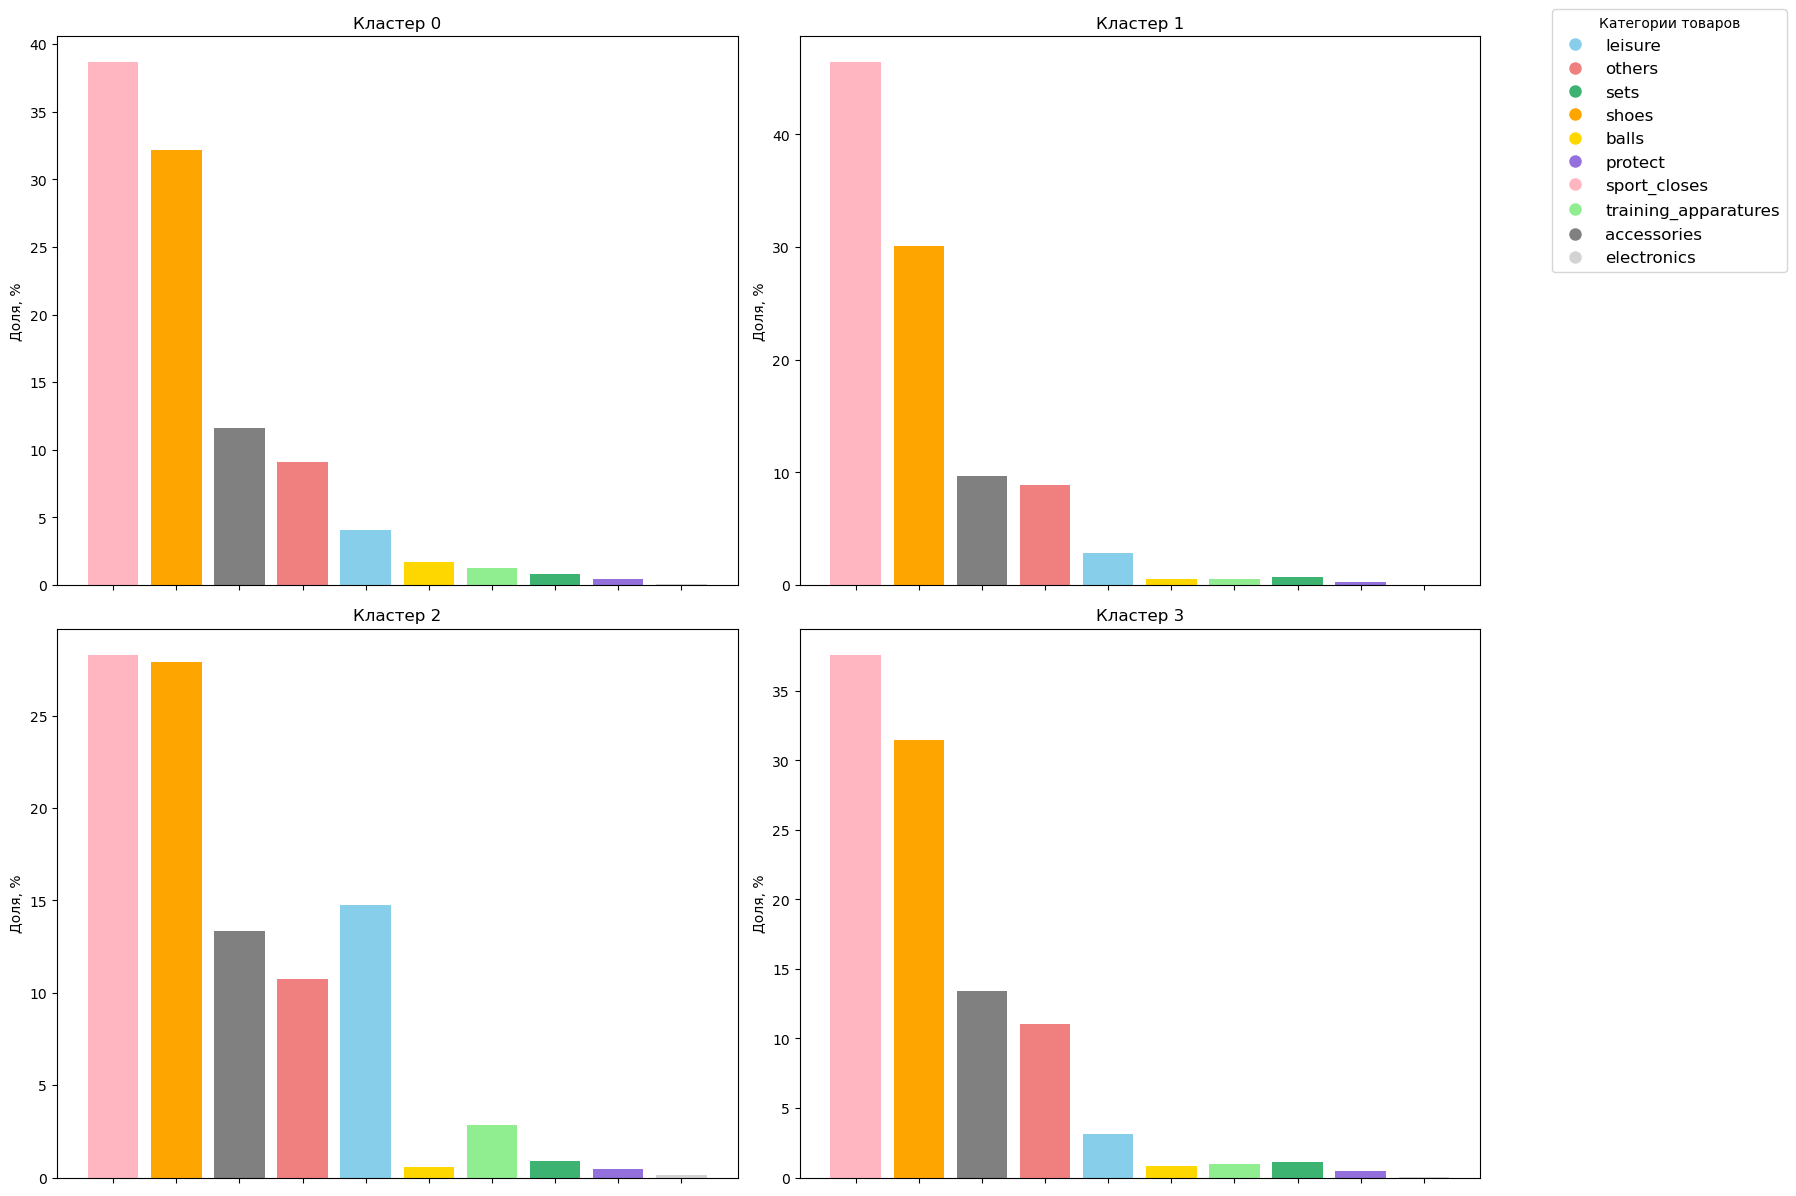

In [205]:
# Cловарь, сопоставляющий каждой категории цвет
category_colors = {
    'leisure': 'skyblue',
    'others': 'lightcoral',
    'sets': 'mediumseagreen',
    'shoes': 'orange',
    'balls': 'gold',
    'protect': 'mediumpurple',
    'sport_closes': 'lightpink',
    'training_apparatures': 'lightgreen',
    'accessories': 'grey',
    'electronics': 'lightgray'
}

# Получаем уникальные значения кластеров и отсортировать их
clusters = sorted(df_clustering1['cluster'].unique())

# Определяем количество рядов и столбцов для размещения диаграмм
rows = 2
cols = 2

# Создаем сетку диаграмм
fig, axes = plt.subplots(rows, cols, figsize=(15, 12), sharex=True)

# Итерируем по кластерам и разместить диаграммы на соответствующих позициях в сетке
for i, cluster in enumerate(clusters):
    row = i // cols
    col = i % cols
    
    cluster_data = df_clustering1[df_clustering1['cluster'] == cluster]
    category_counts = cluster_data['product_category'].value_counts(normalize=True) * 100
    
    # Построение столбчатой диаграммы для каждого кластера с фиксированными цветами для каждой категории
    bars = axes[row, col].bar(category_counts.index, category_counts.values, color=[category_colors[cat] for cat in category_counts.index])
    
    # Убираем надписи на столбцах
    axes[row, col].set_xticklabels([])
    
    axes[row, col].set_title(f'Кластер {cluster}')
    axes[row, col].set_ylabel('Доля, %')

# Добавляем общую легенду с увеличенным размером
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=category_colors[cat], markersize=10, label=cat) for cat in category_colors]
fig.legend(handles=legend_labels, title='Категории товаров', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize='large')

# Убираем подписи категорий по оси x
for ax in axes.flat:
    ax.set_xticklabels([])

# Добавляем общие оси для всех диаграмм
fig.text(0.5, 0.04, '', ha='center', fontsize=14)
fig.tight_layout()
plt.show()

Здесь мы видим, что доля распределения категорий товаров по кластерам практически одинакова. Наиболее востребованные категории - спортивная одежда и обувь. 

#### Доля клиентов, пользующихся скидками по кластерам

In [206]:
cluster_base_sale = pd.crosstab(df_merged_filtered['cluster'], df_merged_filtered['base_sale'], \
                               normalize='index')*100
cluster_base_sale = cluster_base_sale.round(0)
cluster_base_sale.reset_index(inplace=True)

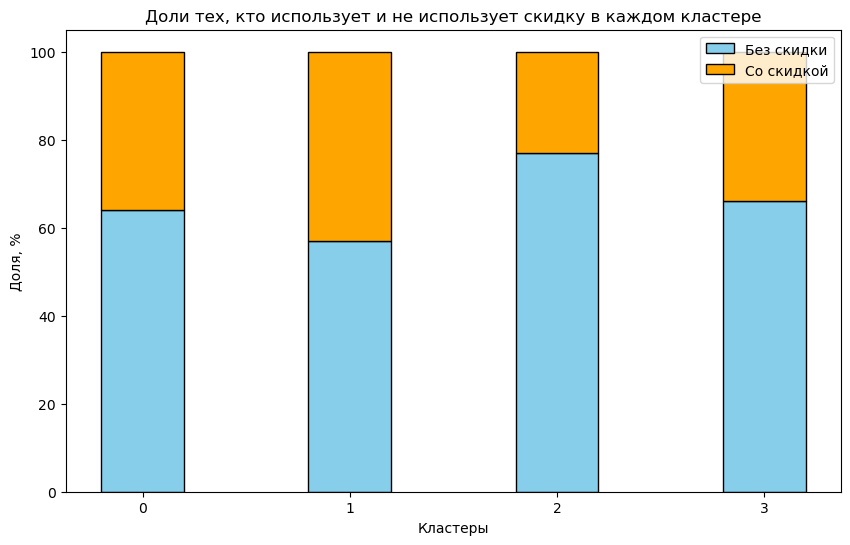

In [207]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))

bar_width = 0.4
bar_positions = range(len(cluster_base_sale))

plt.bar(bar_positions, cluster_base_sale[0], width=bar_width, label='Без скидки', \
        color='skyblue', edgecolor='black')
plt.bar(bar_positions, cluster_base_sale[1], width=bar_width, label='Со скидкой', \
        color='orange', edgecolor='black', bottom=cluster_base_sale[0])

plt.xlabel('Кластеры')
plt.ylabel('Доля, %')
plt.title('Доли тех, кто использует и не использует скидку в каждом кластере')
plt.xticks(bar_positions, cluster_base_sale.index)
plt.legend()

plt.show()

### Описание кластеров и методы работы с каждым из них

## Построение модели склонности клиента к покупке

In [147]:
# Фильтруем из данных интересующий нас город
df_model = df_merged_filtered[df_merged_filtered['city'] == 1188]

### Выбор модели машинного обучения

Наша задача состоит в том, чтобы определить склонность или вероятность покупки определенным клиентом определенного товара. Исходные данные содержат уникальные сложные названия товара. Чтобы сделать эту информацию восприимчивой для модели машинного обучения мы сгенерировали ряд дополнительных признаков - характеристик товара, которые мы будем подавать на вход модели вместо исходных названий товара.  
   
Характеристики клиента изначально представляли собой ограниченный набор данных, состоящий из id, пола, возраста, образования. Мы сгенерировали поведенческие характеристики клиента на основе данных о покупках, и получили дополнительные данные о клиентах, включающие в себя: количество купленных товаров, количество посещений магазина, возрастная группа, "одноразовый" это клиент или нет, вернулся ли он за покупками в другой день или нет, итд. 
  
Чтобы определить купит клиент товар или не купит, нам нужна информация о фактах покупки товара, а также информация о фактах, когда товар не был куплен. Мы имеем в своем распоряжении данные, каждая строка которых - это факт покупки, поэтому мы не можем сразу определить целевую переменную, которая принимала бы два значения. Получается, что целевая переменная имеет одно значение, а на таких условиях обучение модели невозможно.  

**Рекомендательная система**  
Подходящим вариантом решения может быть рекомендательная система. На основе имеющихся данных мы строим зависимость типов клиентов от характеристик покупаемого ими товара. 

Прежде всего у нас должна быть матрица взаимодействий, где строки представляют клиентов, столбцы -товары, а значения указывают наличие/отсутствие покупки. Поскольку у нас информация только о покупках, мы можем создать такую матрицу, где 1 будет означать покупку, а 0 - отсутствие покупки.  

Для создания матрицы необходимо определить, какие столбцы будут характеризовать продукт, а какие - клиента. Если в столбце слишком много уникальных значений, то это может перегрузить модель и снизить ее эффективность обучения.

### Подготовка данных

In [148]:
df_model.columns

Index(['id', 'product', 'colour', 'cost', 'product_sex', 'base_sale', 'dt',
       'gender_age_category', 'product_category', 'main_colour', 'gender',
       'age', 'education', 'city', 'country', 'personal_coef', 'test_positive',
       'test_negative', 'age_category', 'more_one_item', 'return_client',
       'count_item', 'many_items', 'count_days', 'ltv', 'long_ltv',
       'expensive_item', 'cluster'],
      dtype='object')

Теперь определим столбцы для матрицы взаимодействия.  
Столбцы, которые характеризуют продукт:  
- product_sex  
- base_sale  
- gender_age_category  
- product_category  
- expensive_item

Столбцы, которые характеризуют клиента:  
- gender  
- education  
- test_positive  
- test_negative  
- age_category  
- more_one_item  
- return_client  
- cluster  
- long_ltv  
- many_items  

In [149]:
def data_interaction(df):
    label_encoder = LabelEncoder()
    
    df = df.copy()
    
    # Определим столбцы, которые нужно удалить
    columns_to_drop = ['id', 'product', 'colour', 'cost', 'dt', 'main_colour', 'age', 'city', 'country', 'personal_coef', \
                       'count_item', 'count_days', 'ltv']
    
    df.drop(columns = columns_to_drop, axis = 1, inplace = True)
    
    # Кодируем строковые значения в числовые
    label_columns = ['gender_age_category', 'product_category', 'education', 'age_category']
    for column in label_columns:
        df[column] = LabelEncoder().fit_transform(df[column])
        
    
    # Создаем признак с комбинациями для продуктов
    df['interaction_product'] = df['product_sex'].astype(str) + '_' + \
                                df['base_sale'].astype(str) + '_' + \
                                df['gender_age_category'].astype(str) + '_' + \
                                df['product_category'].astype(str)  + '_' + \
                                df['expensive_item'].astype(str)
    
    # Кодируем признак в числовые значения для восприятия моделью
    df['interaction_product'] = label_encoder.fit_transform(df['interaction_product'])
    
    # Создаем признак с комбинациями характеристик клиентов
    df['interaction_client'] = df['gender'].astype(str) + '_' + df['education'].astype(str) + '_' + \
    df['test_positive'].astype(str) + '_' + df['test_negative'].astype(str) + '_' \
    + df['age_category'].astype(str) + '_' + df['more_one_item'].astype(str) + '_' + \
    df['return_client'].astype(str) + '_' + df['cluster'].astype(str) + '_' + \
    df['long_ltv'].astype(str) + '_' + df['many_items'].astype(str)
    
    # Кодируем признак в числовые значения для загрузки в модель
    df['interaction_client'] = label_encoder.fit_transform(df['interaction_client'])
    
    # Создаем дополнительный признак, обозначающий факт покупки
    df['purchase'] = 1
    
    # Теперь создадим саму матрицу взаимодействий:
    
    interaction_matrix = pd.pivot_table(df, values='purchase', index='interaction_client', \
                                    columns='interaction_product', fill_value=0)
    
    return interaction_matrix

Теперь создадим саму матрицу взаимодействий:

In [150]:
interaction_matrix = data_interaction(df_model)

In [151]:
interaction_matrix

interaction_product,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
interaction_client,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df_model.columns

Index(['id', 'product', 'colour', 'cost', 'product_sex', 'base_sale', 'dt',
       'gender_age_category', 'product_category', 'main_colour', 'gender',
       'age', 'education', 'city', 'country', 'personal_coef', 'test_positive',
       'test_negative', 'age_category', 'more_one_item', 'return_client',
       'count_item', 'many_items', 'count_days', 'ltv', 'long_ltv',
       'expensive_item', 'cluster'],
      dtype='object')

In [153]:
columns_to_drop = ['id', 'product', 'colour', 'cost', 'dt', 'main_colour', 'age', 'city', 'country', 'personal_coef', \
                       'count_item', 'count_days', 'ltv']

In [154]:
df_model = df_model.drop(columns=columns_to_drop, axis=1)
df_model.columns

Index(['product_sex', 'base_sale', 'gender_age_category', 'product_category',
       'gender', 'education', 'test_positive', 'test_negative', 'age_category',
       'more_one_item', 'return_client', 'many_items', 'long_ltv',
       'expensive_item', 'cluster'],
      dtype='object')

In [155]:
# Разбиваем данные на обучающий и тестовый наборы
y = interaction_matrix.iloc[:, 0]
X = interaction_matrix.iloc[:, 1:]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Определяем размерности входных данных
num_user_features = X.shape[0]
num_item_features = X.shape[1]

### Создание и обучение модели

Создаем модель, которая представляет собой **комбинированную модель CF (Collaborative Filtering) и MLP (Multilayer Perceptron) для рекомендательных систем**

In [158]:
# Создаем модель
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(num_item_features,), name='item_input')

user_embedding = Embedding(input_dim=num_user_features, output_dim=32, input_length=1)(user_input)
user_embedding = Flatten()(user_embedding)
item_embedding = Dense(32, activation='relu')(item_input)

concatenated = Concatenate()([user_embedding, item_embedding])
dense1 = Dense(64, activation='relu')(concatenated)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='sigmoid')(dense2)

model = Model(inputs=[user_input, item_input], outputs=output)

# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
model.fit([X_train.index.values, X_train.reset_index(drop=True)], y_train, epochs=10, batch_size=32,
          validation_data=([X_test.index.values, X_test.reset_index(drop=True)], y_test))



Epoch 1/10


10/10 [==============================] - 4s 37ms/step - loss: 0.7021 - accuracy: 0.5017 - val_loss: 0.6250 - val_accuracy: 0.9865
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.5945 - accuracy: 0.9113 - val_loss: 0.5048 - val_accuracy: 0.9730
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4875 - accuracy: 0.9147 - val_loss: 0.3631 - val_accuracy: 0.9730
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.3688 - accuracy: 0.9147 - val_loss: 0.2323 - val_accuracy: 0.9730
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2707 - accuracy: 0.9147 - val_loss: 0.1511 - val_accuracy: 0.9730
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2035 - accuracy: 0.9181 - val_loss: 0.0996 - val_accuracy: 0.9730
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1600 - accuracy: 0.9488 - val_loss: 0.0739 - val_accuracy: 1.0000
Epoch 8/10
10/1

In [159]:
# Обучаем модель на полных данных
model.fit([X.index.values, X.reset_index(drop=True)], y, epochs=10, batch_size=32,
          validation_data=([X.index.values, X.reset_index(drop=True)], y))

Epoch 1/10
12/12 [==============================] - 0s 9ms/step - loss: 0.0529 - accuracy: 0.9837 - val_loss: 0.0381 - val_accuracy: 0.9891
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9864 - val_loss: 0.0244 - val_accuracy: 0.9973
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9973 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 8/10
12/12 [==

### Визуализация работы модели

3/3 [==============================] - 0s 1ms/step


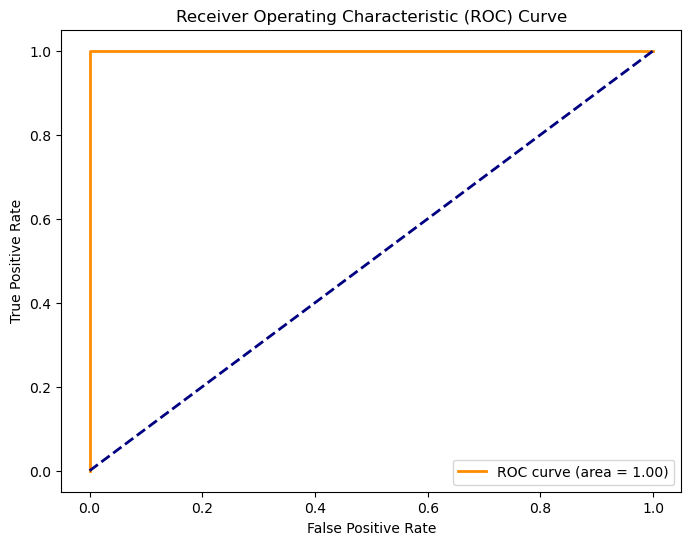

In [160]:
# Получаем вероятности положительного класса (покупка)
y_pred_prob = model.predict([X_test.index.values, X_test.reset_index(drop=True)])

# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Figure size 800x600 with 0 Axes>

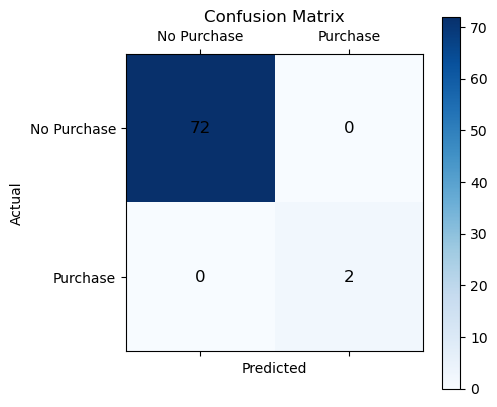

In [161]:
y_pred = (y_pred_prob > 0.5).astype(int)
# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

# Строим тепловую карту
plt.figure(figsize=(8, 6))
cax = plt.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar(cax)

# Добавляем аннотации
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=12)

plt.xticks([0, 1], ['No Purchase', 'Purchase'])
plt.yticks([0, 1], ['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Результаты работы модели

По матрице ошибок видно, что в модели имеется большое количество правильно предсказанных отрицательных результатов по покупке, и при этом почти нет правильно предсказанных положительных результатов покупки. Это говорит о том, что матрица взаимодействий, которая поступает на вход модели не сбалансированна по результатам покупок. В ней слишком мало положительных результатов и слишком много отрицательных. Такое могло получиться из-за слишком большого количества признаков, которые подаются на вход модели. 

### Модель Вариант 2

Попробуем уменьшить количество исходных признаков.

Столбцы, которые характеризуют продукт:  
- product_sex  
- base_sale  
- product_category  
- expensive_item

Столбцы, которые характеризуют клиента:  
- gender    
- test_positive  
- test_negative   
- cluster  


In [162]:
def data_interaction_min(df):
    label_encoder = LabelEncoder()
    
    df = df.copy()
    
    df = df[['product_sex', 'base_sale', 'product_category', 'gender', 'test_positive', 'test_negative', 'cluster', \
            'expensive_item']]
    
    # Кодируем строковые значения в числовые
    df['product_category'] = LabelEncoder().fit_transform(df['product_category'])
        
    
    # Создаем признак с комбинациями для продуктов
    df['interaction_product'] = df['product_sex'].astype(str) + '_' + \
                                df['base_sale'].astype(str) + '_' + \
                                df['product_category'].astype(str)
    
    # Кодируем признак в числовые значения для восприятия моделью
    df['interaction_product'] = label_encoder.fit_transform(df['interaction_product'])
    
    # Создаем признак с комбинациями характеристик клиентов
    df['interaction_client'] = df['gender'].astype(str) + '_' + df['test_positive'].astype(str) + \
    '_' + df['test_negative'].astype(str) + '_' + df['cluster'].astype(str) + '_' + df['expensive_item'].astype(str)
    
    # Кодируем признак в числовые значения для загрузки в модель
    df['interaction_client'] = label_encoder.fit_transform(df['interaction_client'])
    
    # Создаем дополнительный признак, обозначающий факт покупки
    df['purchase'] = 1
    
    # Теперь создадим саму матрицу взаимодействий:
    
    interaction_matrix = pd.pivot_table(df, values='purchase', index='interaction_client', \
                                    columns='interaction_product', fill_value=0)
    
    return interaction_matrix

In [163]:
interaction_matrix_min = data_interaction_min(df_model)

In [164]:
interaction_matrix_min.shape

(83, 36)

In [165]:
# Разбиваем данные на обучающий и тестовый наборы
y = interaction_matrix_min.iloc[:, 0]
X = interaction_matrix_min.iloc[:, 1:]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Определяем размерности входных данных
num_user_features = X.shape[0]
num_item_features = X.shape[1]

In [168]:
# Создаем модель
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(num_item_features,), name='item_input')

user_embedding = Embedding(input_dim=num_user_features, output_dim=32, input_length=1)(user_input)
user_embedding = Flatten()(user_embedding)
item_embedding = Dense(32, activation='relu')(item_input)

concatenated = Concatenate()([user_embedding, item_embedding])
dense1 = Dense(64, activation='relu')(concatenated)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='sigmoid')(dense2)

model = Model(inputs=[user_input, item_input], outputs=output)

# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
model.fit([X_train.index.values, X_train.reset_index(drop=True)], y_train, epochs=10, batch_size=32,
          validation_data=([X_test.index.values, X_test.reset_index(drop=True)], y_test))

Epoch 1/10
3/3 [==============================] - 1s 84ms/step - loss: 0.6919 - accuracy: 0.4091 - val_loss: 0.6000 - val_accuracy: 0.5882
Epoch 2/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6360 - accuracy: 0.5455 - val_loss: 0.5439 - val_accuracy: 0.5882
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 0.5917 - accuracy: 0.5758 - val_loss: 0.4976 - val_accuracy: 0.5882
Epoch 4/10
3/3 [==============================] - 0s 15ms/step - loss: 0.5549 - accuracy: 0.7273 - val_loss: 0.4589 - val_accuracy: 0.8824
Epoch 5/10
3/3 [==============================] - 0s 14ms/step - loss: 0.5244 - accuracy: 0.8333 - val_loss: 0.4262 - val_accuracy: 0.8824
Epoch 6/10
3/3 [==============================] - 0s 14ms/step - loss: 0.4973 - accuracy: 0.8636 - val_loss: 0.3998 - val_accuracy: 0.8824
Epoch 7/10
3/3 [==============================] - 0s 14ms/step - loss: 0.4724 - accuracy: 0.8636 - val_loss: 0.3748 - val_accuracy: 0.8824
Epoch 8/10
3/3 [===========

1/1 [==============================] - 0s 65ms/step


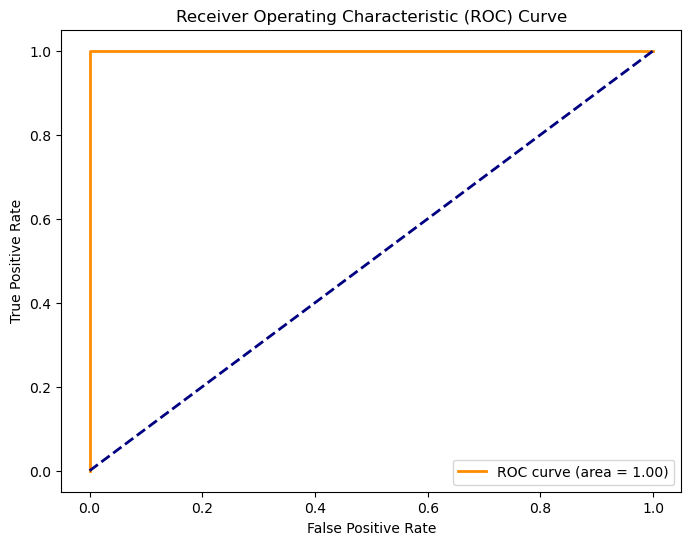

In [169]:
# Получаем вероятности положительного класса (покупка)
y_pred_prob = model.predict([X_test.index.values, X_test.reset_index(drop=True)])

# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Figure size 800x600 with 0 Axes>

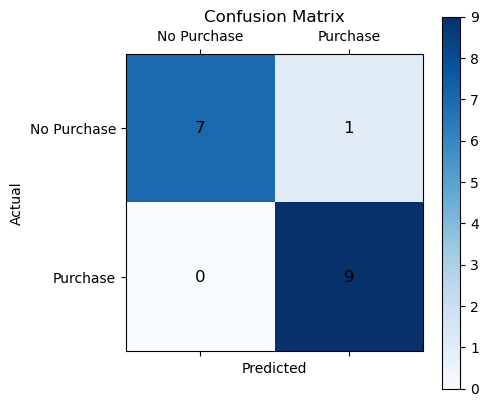

In [170]:
y_pred = (y_pred_prob > 0.5).astype(int)

# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

# Строим тепловую карту
plt.figure(figsize=(8, 6))
cax = plt.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar(cax)

# Добавляем аннотации
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=12)

plt.xticks([0, 1], ['No Purchase', 'Purchase'])
plt.yticks([0, 1], ['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

В результате работы второго варианта модели мы видим, что данные сбалансированы.

### Интерпретация результатов модели

1) Значение **loss** на тренировочных данных уменьшается с каждой итерацией, что хорошо.  
2) Значение **accuracy** на тренировочных данных увеличивается, что также хорошо.  
3) **Validation loss** и **accuracy** показывают, как модель обучается на новых данных. В нашем случае, они тоже улучшаются, что свидетельствует о том, что модель хорошо обучается и не переобучается на тренировочных данных.  
4) Модель показывает хорошие результаты, так как точность на валидационных данных также высока.